In [309]:
import pandas as pd
from prophet import Prophet
from math import pi

import datetime as dt
import numpy as np
import calendar
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

In [310]:
# Read in average monthly temperature by state data
revised_region_sales_temp_data = 'Resources/adidas_default.csv'
revised_region_sales_temp_df = pd.read_csv(revised_region_sales_temp_data,
                               index_col='Month')

print(revised_region_sales_temp_df.dtypes)


Unnamed: 0        int64
State            object
Year              int64
Region           object
Gender           object
Product          object
Units Sold        int64
Total Sales       int64
Average Temp    float64
dtype: object


In [311]:
file_path = "Resources/adidas_default.csv"
revised_region_sales_temp_data = pd.read_csv(file_path)

def process_temperature_and_sales(revised_region_sales_temp_df):
    # Ensure the input is a DataFrame
    if not isinstance(revised_region_sales_temp_df, pd.DataFrame):
        raise TypeError("Input must be a Pandas DataFrame.")
    

    required_columns = ['Average Temp', 'Total Sales', 'Region', 'Product', 'Month']
    for col in required_columns:
        if col not in revised_region_sales_temp_df.columns:
            raise ValueError(f"Missing required column: {col}")

In [312]:

revised_region_sales_temp_df['Average Temp'] = revised_region_sales_temp_df['Average Temp'].astype(int) 
print(revised_region_sales_temp_df.dtypes)


Unnamed: 0       int64
State           object
Year             int64
Region          object
Gender          object
Product         object
Units Sold       int64
Total Sales      int64
Average Temp     int64
dtype: object


In [313]:
print(type(revised_region_sales_temp_data))
print(revised_region_sales_temp_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'State', 'Year', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp'],
      dtype='object')


In [314]:
if isinstance(revised_region_sales_temp_data, dict):
    revised_region_sales_temp_data = pd.DataFrame(revised_region_sales_temp_data)

In [315]:
print("Type of input:", type(revised_region_sales_temp_data))
print("Input content:", revised_region_sales_temp_data)


Type of input: <class 'pandas.core.frame.DataFrame'>
Input content:       Unnamed: 0    State  Year  Month Region   Gender            Product  \
0              0  Alabama  2021      8  South    Men's            Apparel   
1              1  Alabama  2021      8  South    Men's  Athletic Footwear   
2              2  Alabama  2021      8  South    Men's    Street Footwear   
3              3  Alabama  2021      8  South  Women's            Apparel   
4              4  Alabama  2021      8  South  Women's  Athletic Footwear   
...          ...      ...   ...    ...    ...      ...                ...   
2701        3025  Wyoming  2021     12   West    Men's  Athletic Footwear   
2702        3026  Wyoming  2021     12   West    Men's    Street Footwear   
2703        3027  Wyoming  2021     12   West  Women's            Apparel   
2704        3028  Wyoming  2021     12   West  Women's  Athletic Footwear   
2705        3029  Wyoming  2021     12   West  Women's    Street Footwear   

      U

In [316]:

revised_region_sales_temp_data = pd.DataFrame(revised_region_sales_temp_data)

def process_temperature_and_sales(revised_region_sales_temp_df):

    if not isinstance(revised_region_sales_temp_df, pd.DataFrame):
        raise TypeError("Input must be a Pandas DataFrame.")


    required_columns = ['Average Temp', 'Total Sales', 'Region', 'Product', 'Month']
    for col in required_columns:
        if col not in revised_region_sales_temp_df.columns:
            raise ValueError(f"Missing required column: {col}")


    buckets = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
    labels = [
        "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40",
        "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75",
        "75-80", "80-85", "85 and Above"
    ]

    revised_region_sales_temp_df['Temp Bucket'] = pd.cut(
        revised_region_sales_temp_df['Average Temp'], bins=buckets, labels=labels, right=False
    )

    aggregated_sales = revised_region_sales_temp_df.groupby(
        ['Temp Bucket', 'Region', 'Product', 'Month']
    )['Total Sales'].sum().reset_index()

    return revised_region_sales_temp_df, aggregated_sales

revised_region_sales_temp_df, processed_data = process_temperature_and_sales(revised_region_sales_temp_data)

print("Columns after processing:", revised_region_sales_temp_df.columns)
print("Processed data columns:", processed_data.columns)





Columns after processing: Index(['Unnamed: 0', 'State', 'Year', 'Month', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp', 'Temp Bucket'],
      dtype='object')
Processed data columns: Index(['Temp Bucket', 'Region', 'Product', 'Month', 'Total Sales'], dtype='object')


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/2075256165.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_sales = revised_region_sales_temp_df.groupby(


In [317]:
print(revised_region_sales_temp_df.columns)

Index(['Unnamed: 0', 'State', 'Year', 'Month', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp', 'Temp Bucket'],
      dtype='object')


In [318]:
aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Total Sales'].sum().reset_index()


In [319]:
pivoted_data = aggregated_data.pivot(index='Month', columns='Region', values='Total Sales')


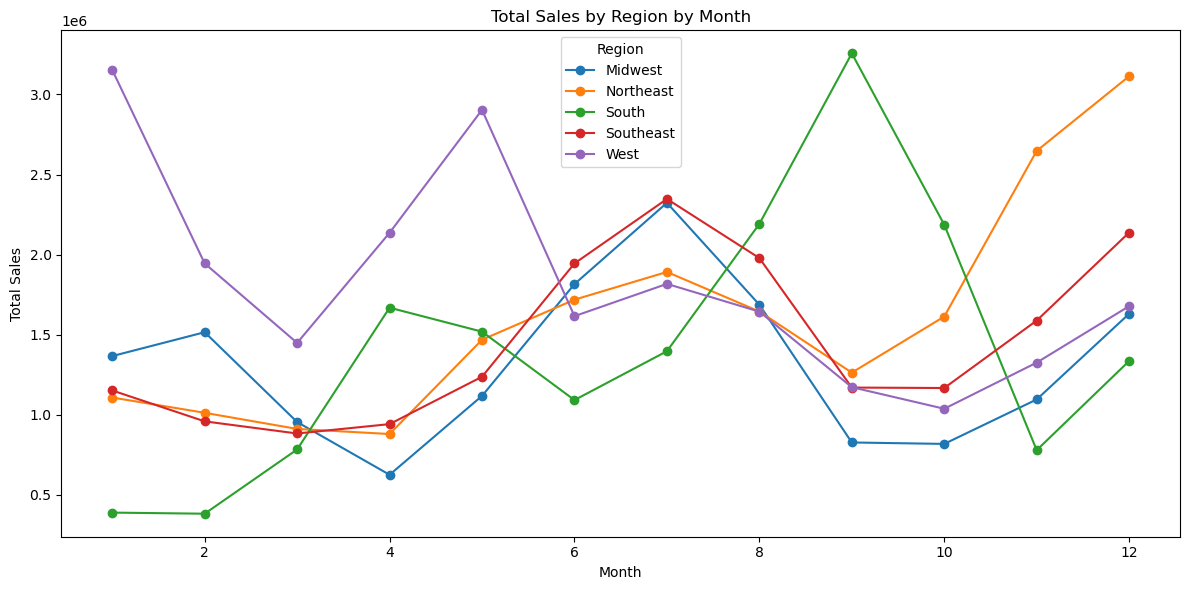

In [320]:
pivoted_data.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Total Sales by Region by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.tight_layout()

plt.show()


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1818529399.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = revised_region_sales_temp_df.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


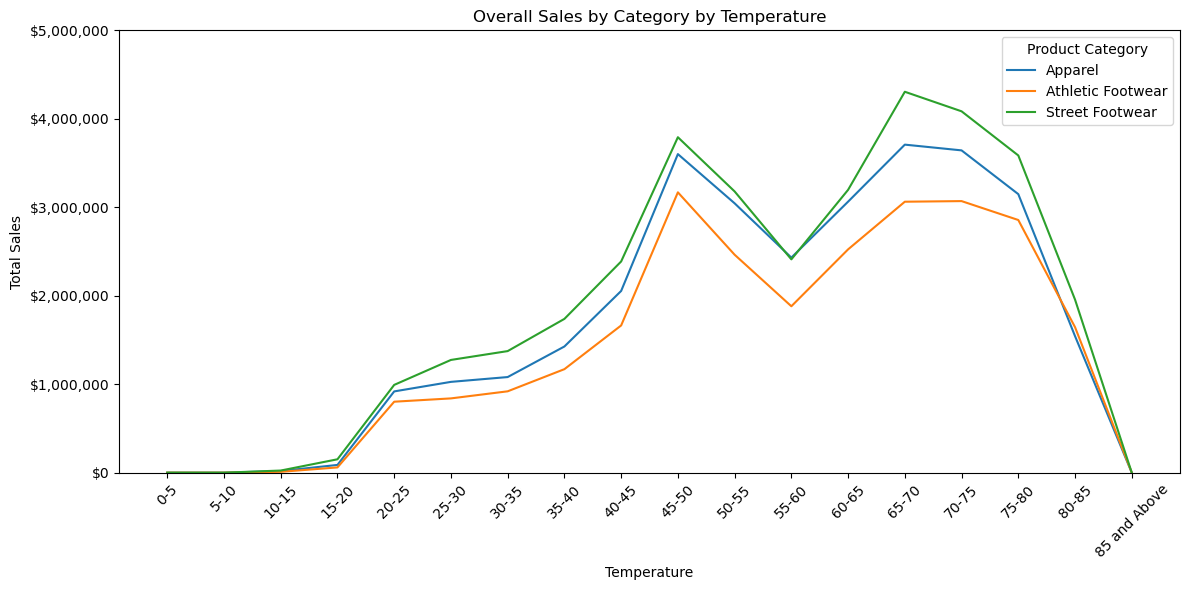

In [321]:
aggregated_data = revised_region_sales_temp_df.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()

pivoted_data = aggregated_data.pivot(index='Temp Bucket', columns='Product', values='Total Sales')
pivoted_data.plot(kind='line', figsize=(12, 6))



plt.title('Overall Sales by Category by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')

plt.xticks(ticks=range(len(pivoted_data.index)), labels=pivoted_data.index, rotation=45)
plt.ylim(0, 5_000_000) 

ax = plt.gca()  # Get the current axes
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


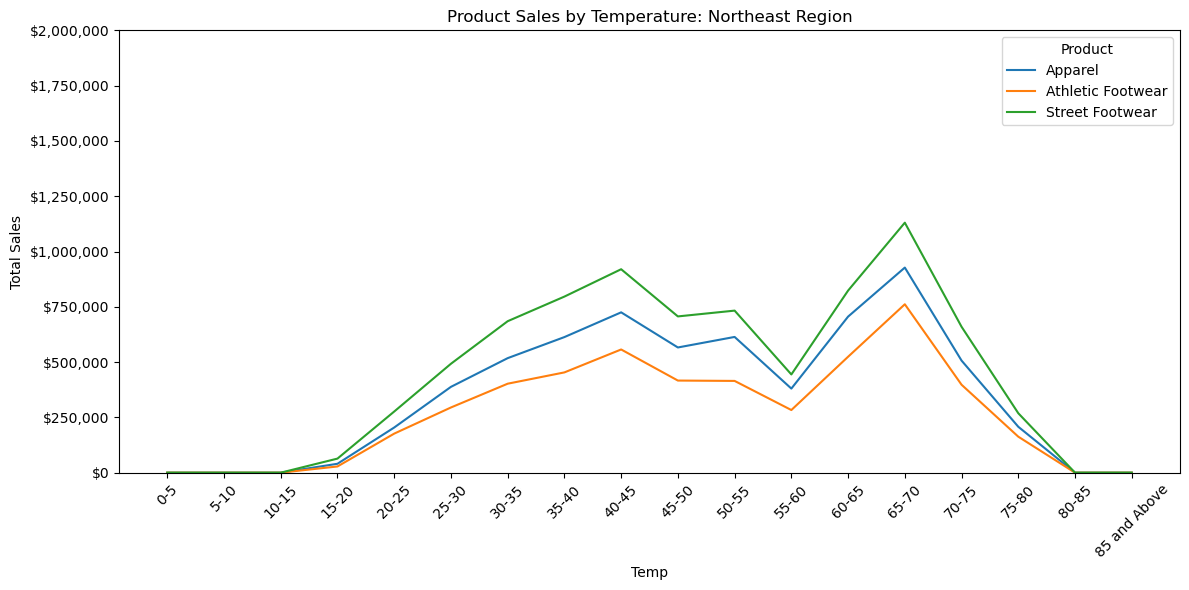

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


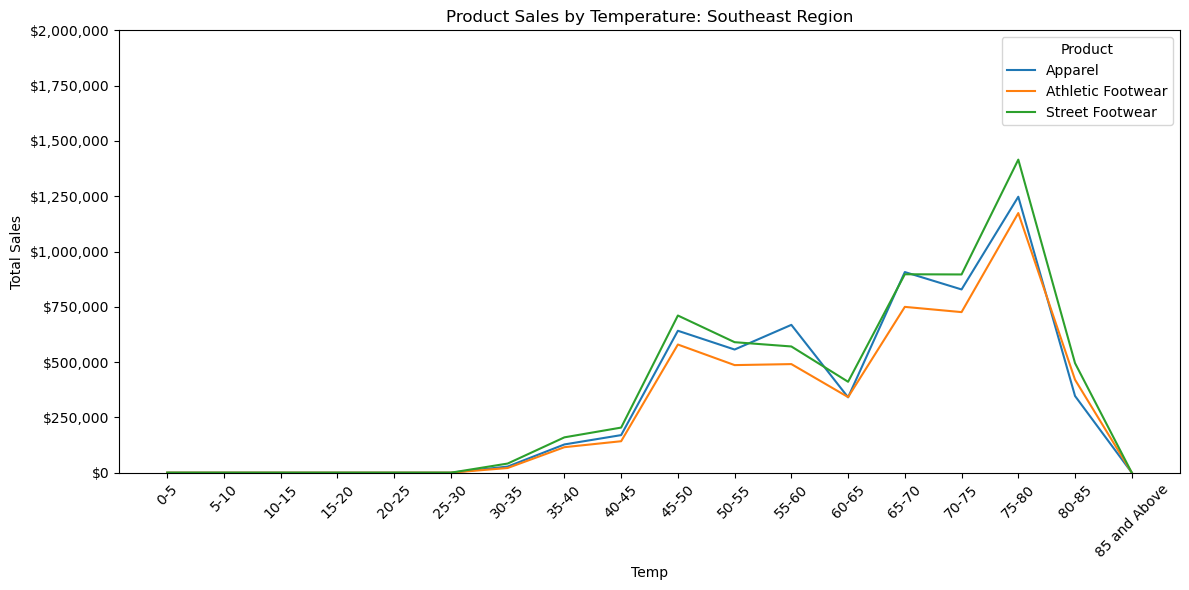

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


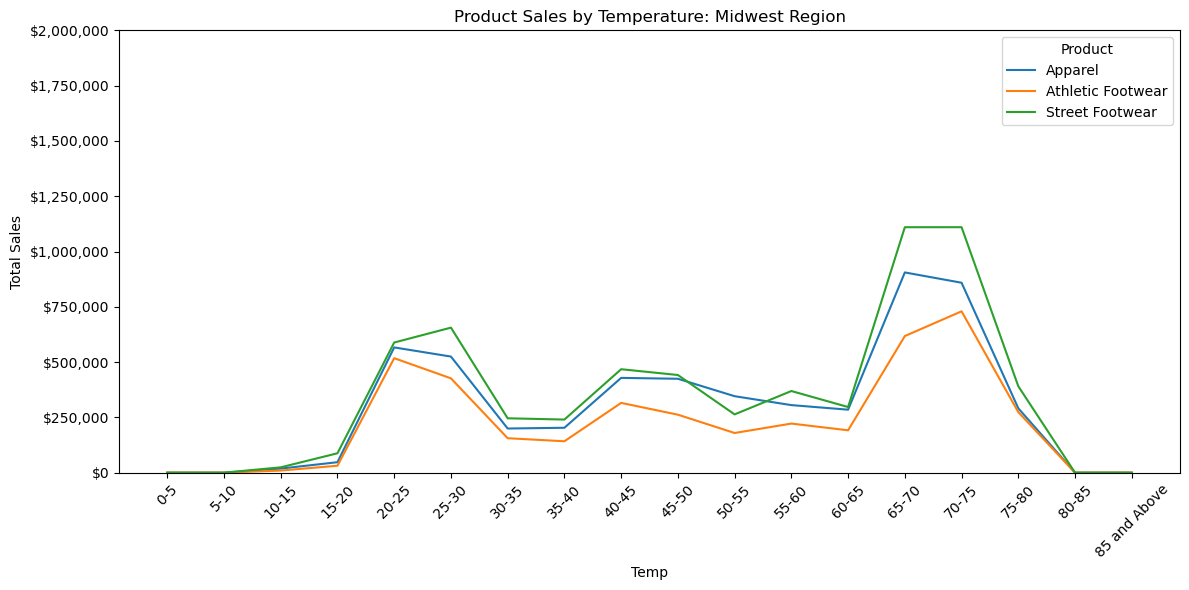

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


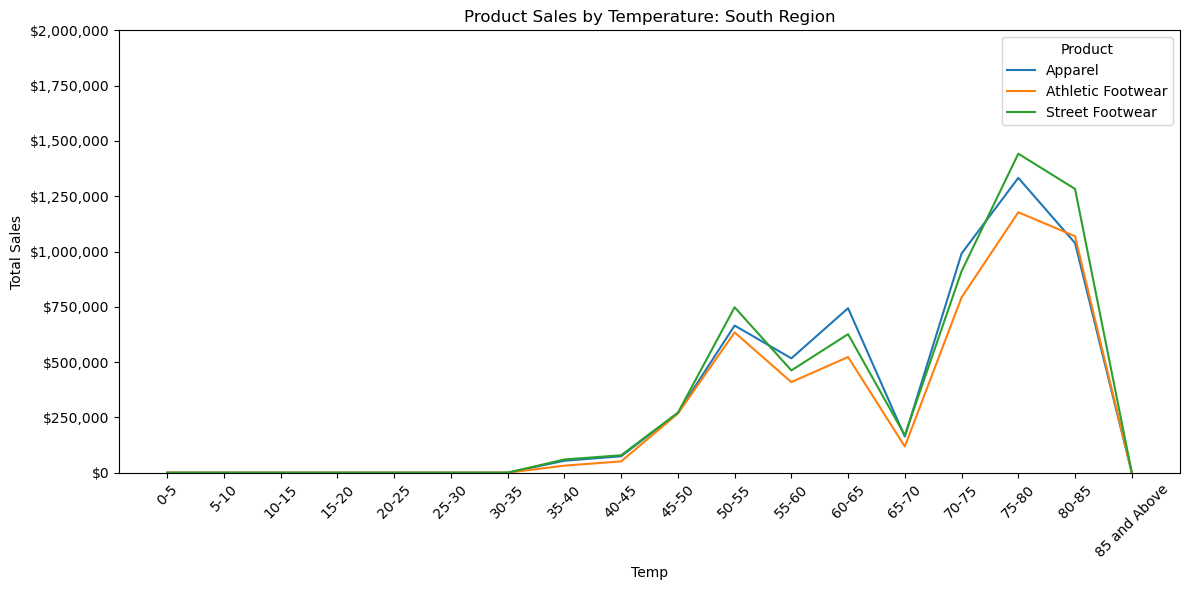

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1082839393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


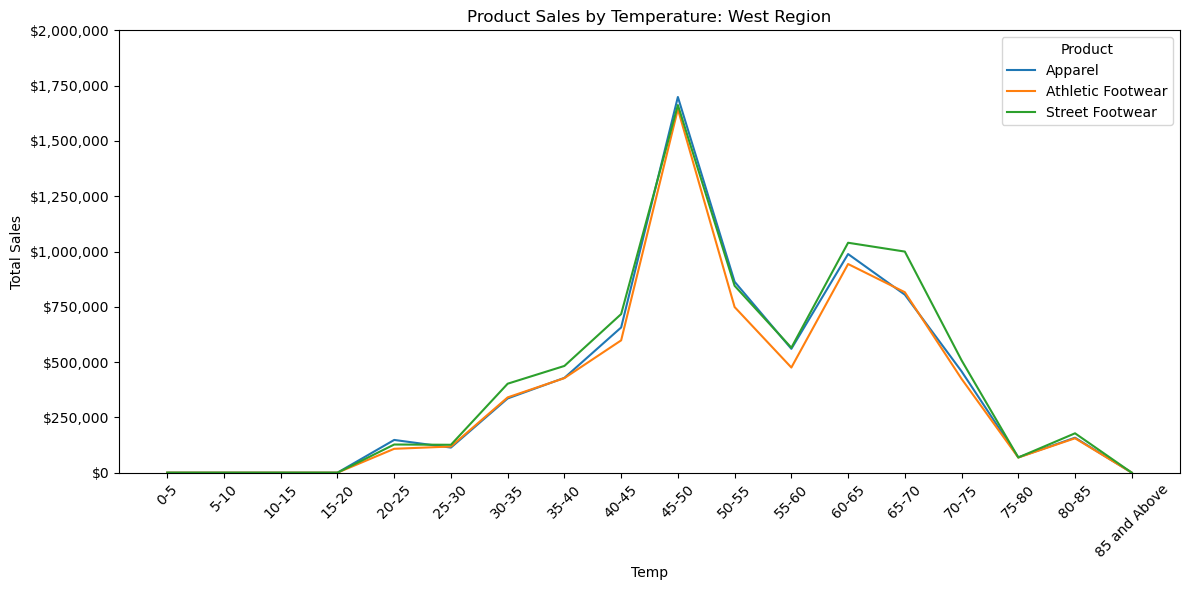

In [322]:
regions = ['Northeast', 'Southeast', 'Midwest', 'South', 'West']


for region in regions:
    region_data = revised_region_sales_temp_df[revised_region_sales_temp_df['Region'] == region]


    aggregated_data = region_data.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()
    pivoted_data = aggregated_data.pivot(index='Temp Bucket', columns='Product', values='Total Sales')

    pivoted_data.plot(kind='line', figsize=(12, 6))

    plt.title(f'Product Sales by Temperature: {region} Region')
    plt.xlabel('Temp')
    plt.ylabel('Total Sales')
    plt.legend(title='Product')

    plt.xticks(ticks=range(len(pivoted_data.index)), labels=pivoted_data.index, rotation=45)

    plt.ylim(0, 2_000_000)


    ax = plt.gca()  # Get the current axes
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  


    plt.tight_layout()
    plt.show()



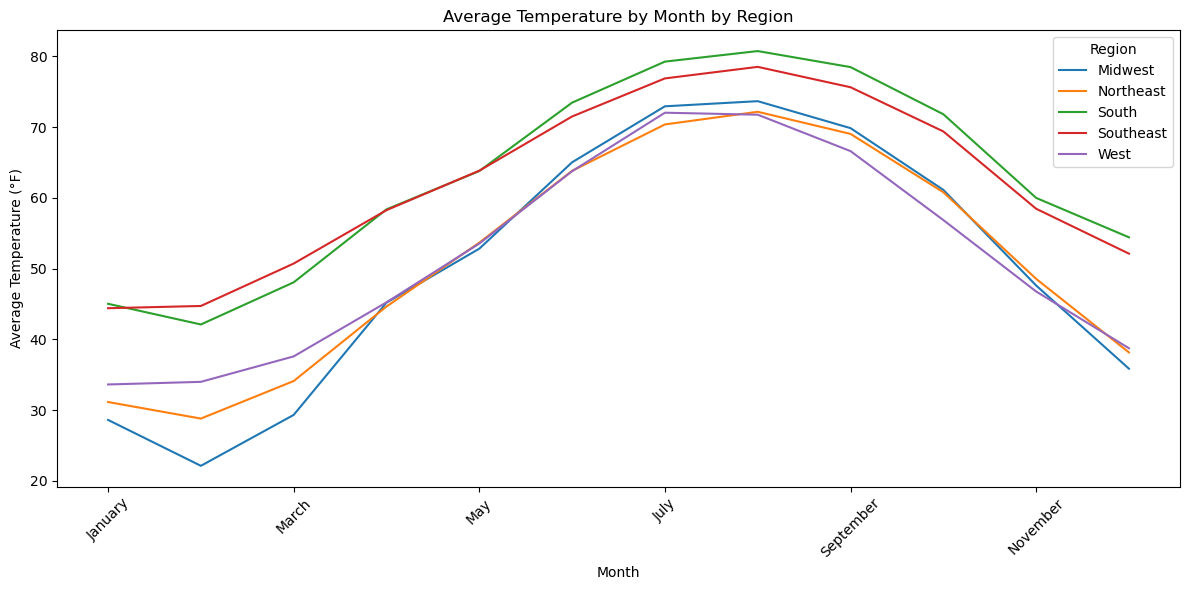

In [323]:


aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Average Temp'].mean().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)


month_order = list(calendar.month_name[1:])
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)


pivoted_data = aggregated_data.pivot(index='Month', columns='Region', values='Average Temp')
pivoted_data = pivoted_data.reindex(month_order)


pivoted_data.plot(kind='line', figsize=(12, 6))

plt.title('Average Temperature by Month by Region')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.legend(title='Region')

plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()




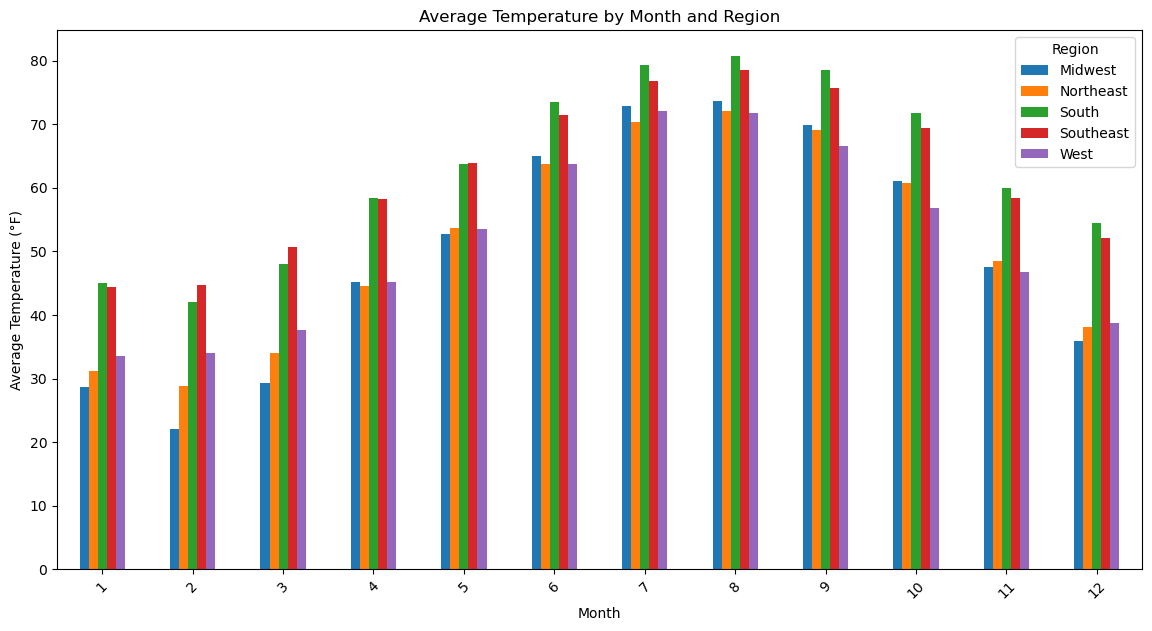

In [324]:
aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Average Temp'].mean().reset_index()
pivoted_data = aggregated_data.pivot(index='Month', columns='Region', values='Average Temp')


pivoted_data.plot(kind='bar', figsize=(14, 7))
plt.title("Average Temperature by Month and Region")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/3837078282.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_temp_and_product = revised_region_sales_temp_df.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()


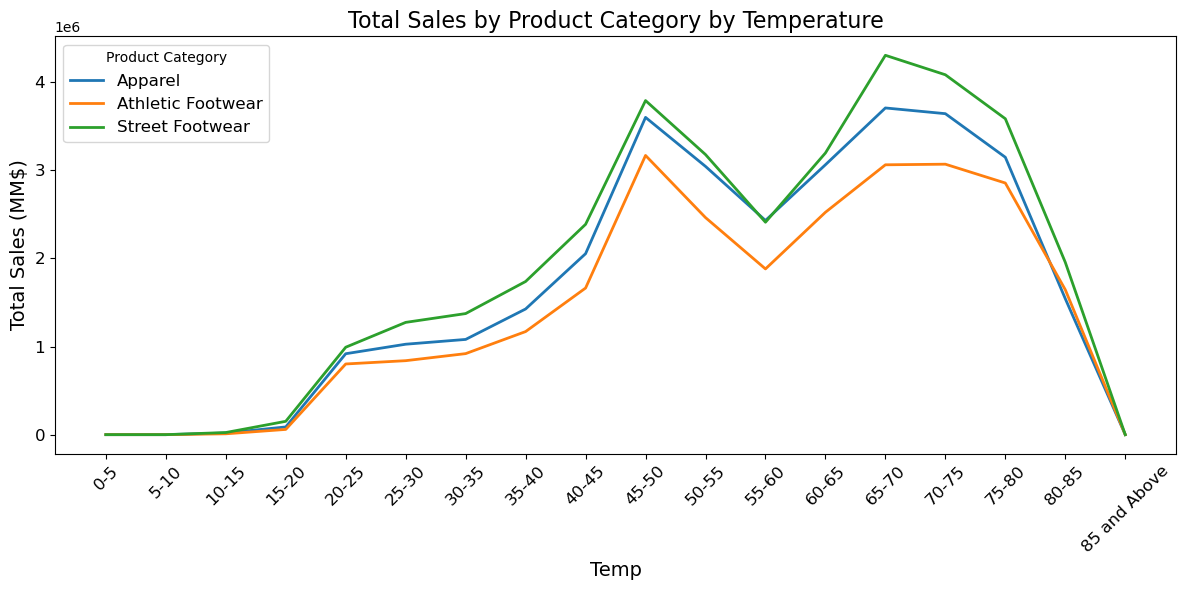

In [325]:

sales_by_temp_and_product = revised_region_sales_temp_df.groupby(['Temp Bucket', 'Product'])['Total Sales'].sum().reset_index()

temp_bucket_order = [
    "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40",
    "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75",
    "75-80", "80-85", "85 and Above"
]
sales_by_temp_and_product['Temp Bucket'] = pd.Categorical(
    sales_by_temp_and_product['Temp Bucket'], categories=temp_bucket_order, ordered=True
)

pivoted_data = sales_by_temp_and_product.pivot(index='Temp Bucket', columns='Product', values='Total Sales')

plt.figure(figsize=(12, 6))
for product in pivoted_data.columns:
    plt.plot(
        pivoted_data.index,  # Temperature Buckets
        pivoted_data[product],  # Sales for the current product
        linestyle='-', linewidth=2, label=product
    )

plt.title('Total Sales by Product Category by Temperature', fontsize=16)
plt.xlabel('Temp', fontsize=14)
plt.ylabel('Total Sales (MM$)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Product Category', fontsize=12)
plt.tight_layout()

# Step 6: Show the plot
plt.show()


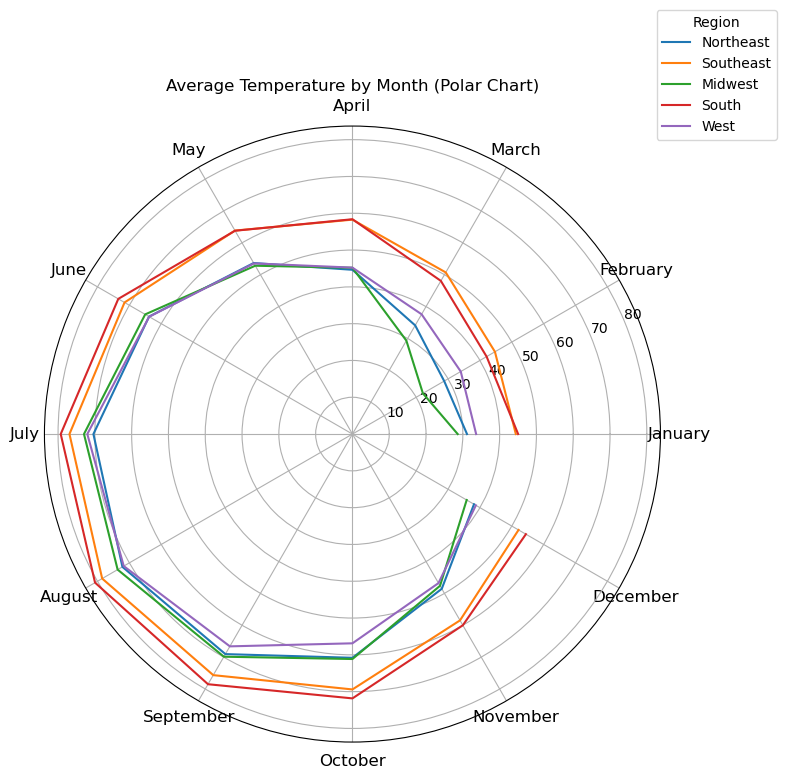

In [326]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Convert months to angles
months = list(calendar.month_name[1:])
angles = [n / float(len(months)) * 2 * pi for n in range(len(months))]

for region in regions:
    region_data = aggregated_data[aggregated_data['Region'] == region]
    values = region_data.sort_values('Month')['Average Temp'].tolist()
    ax.plot(angles, values, label=region)

ax.set_xticks(angles)
ax.set_xticklabels(months, fontsize=12)
ax.legend(title="Region", loc="upper right", bbox_to_anchor=(1.2, 1.2))
plt.title("Average Temperature by Month (Polar Chart)")
plt.show()

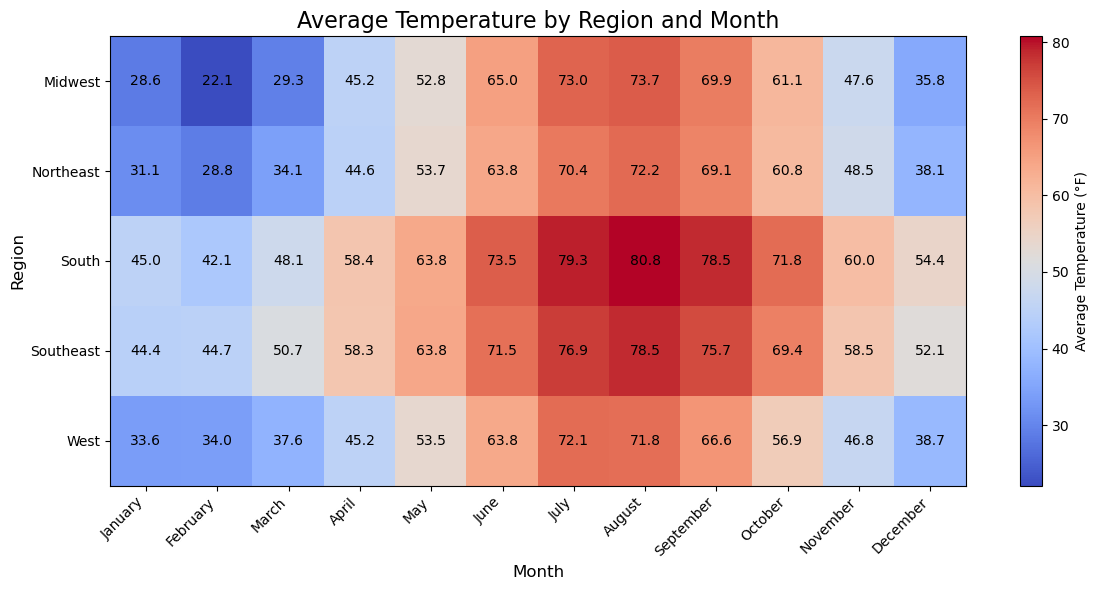

In [364]:

aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Average Temp'].mean().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')  # Ensure Month is numeric
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)

month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)


heatmap_data = aggregated_data.pivot(index='Region', columns='Month', values='Average Temp')

heatmap_values = heatmap_data.fillna(0).values  
regions = heatmap_data.index
months = heatmap_data.columns

plt.figure(figsize=(12, 6))
plt.imshow(heatmap_values, aspect='auto', cmap="coolwarm", origin='upper')

plt.colorbar(label='Average Temperature (°F)')

plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(regions)), labels=regions)

for i in range(heatmap_values.shape[0]):  
    for j in range(heatmap_values.shape[1]):  
        value = heatmap_values[i, j]
        plt.text(j, i, f"{value:.1f}", ha='center', va='center', color="black")

plt.title("Average Temperature by Region and Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Region", fontsize=12)

plt.tight_layout()
plt.show()



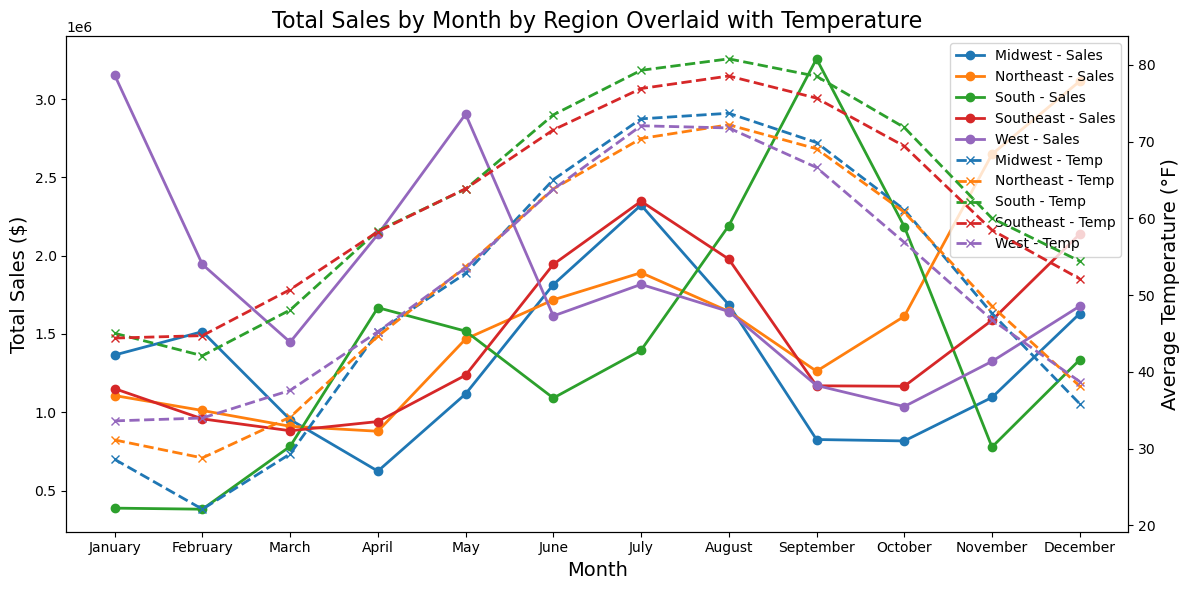

In [327]:


aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region']).agg(
    Total_Sales=('Total Sales', 'sum'),
    Avg_Temp=('Average Temp', 'mean')
).reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)



sales_pivot = aggregated_data.pivot(index='Month', columns='Region', values='Total_Sales')
temp_pivot = aggregated_data.pivot(index='Month', columns='Region', values='Avg_Temp')

fig, ax1 = plt.subplots(figsize=(12, 6))

for region in sales_pivot.columns:
    ax1.plot(
        sales_pivot.index, sales_pivot[region], marker='o', label=f'{region} - Sales', linestyle='-', linewidth=2
    )
ax1.set_ylabel('Total Sales ($)', fontsize=14)
ax1.set_xlabel('Month', fontsize=14)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left', fontsize=10)

ax2 = ax1.twinx()
for region in temp_pivot.columns:
    ax2.plot(
        temp_pivot.index, temp_pivot[region], marker='x', label=f'{region} - Temp', linestyle='--', linewidth=2
    )
ax2.set_ylabel('Average Temperature (°F)', fontsize=14)
ax2.tick_params(axis='y')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10)

plt.title('Total Sales by Month by Region Overlaid with Temperature', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/539851317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data.sort_values('Month', inplace=True)


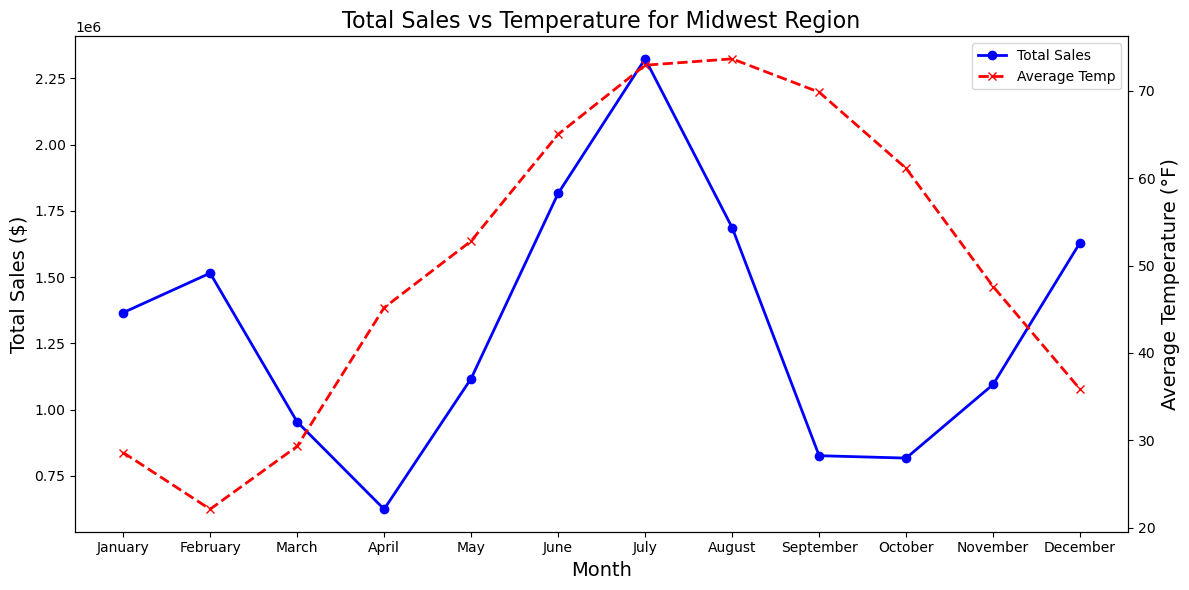

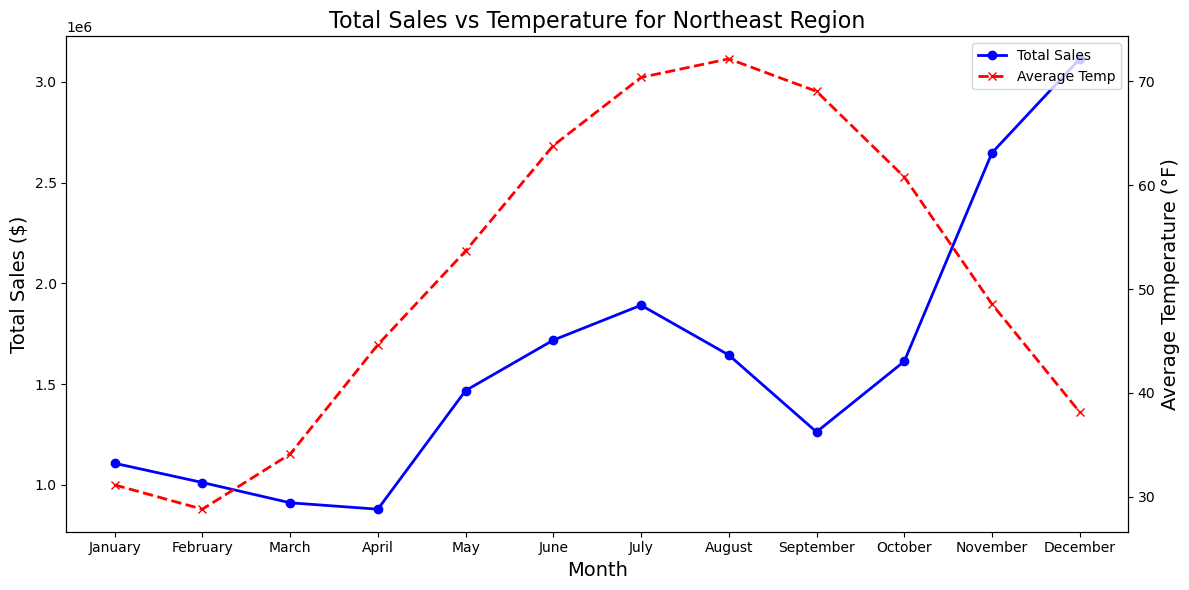

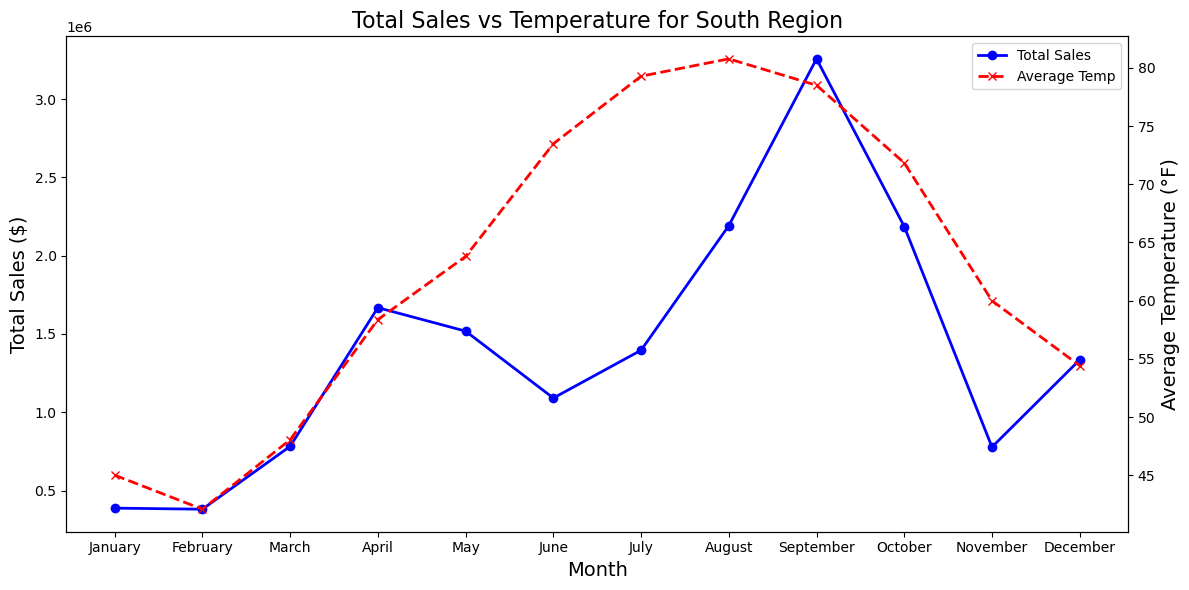

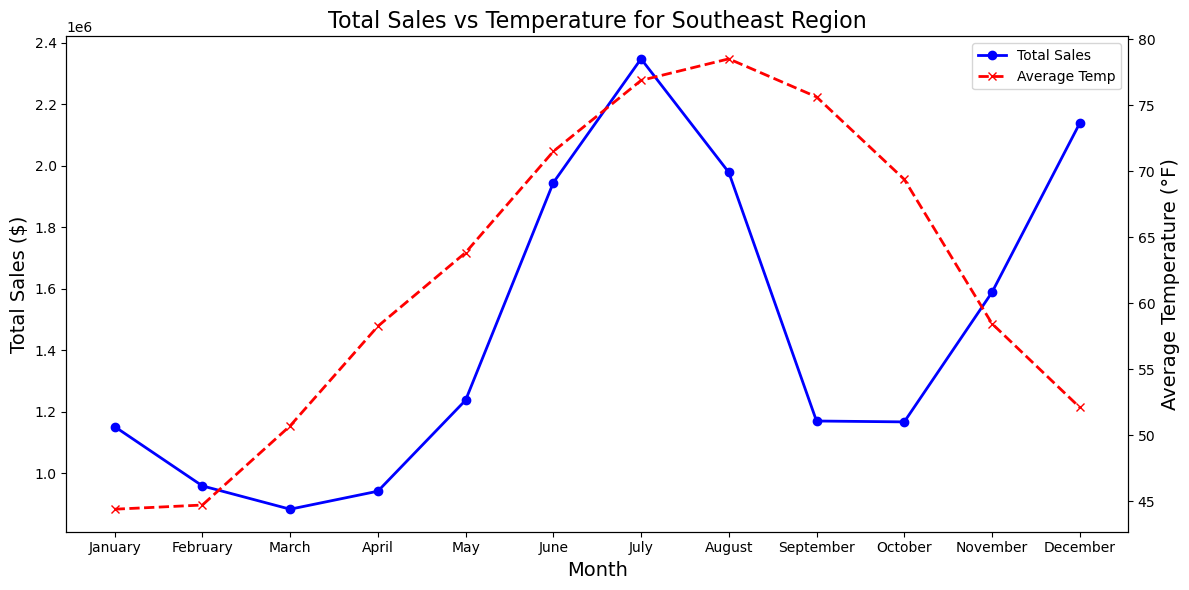

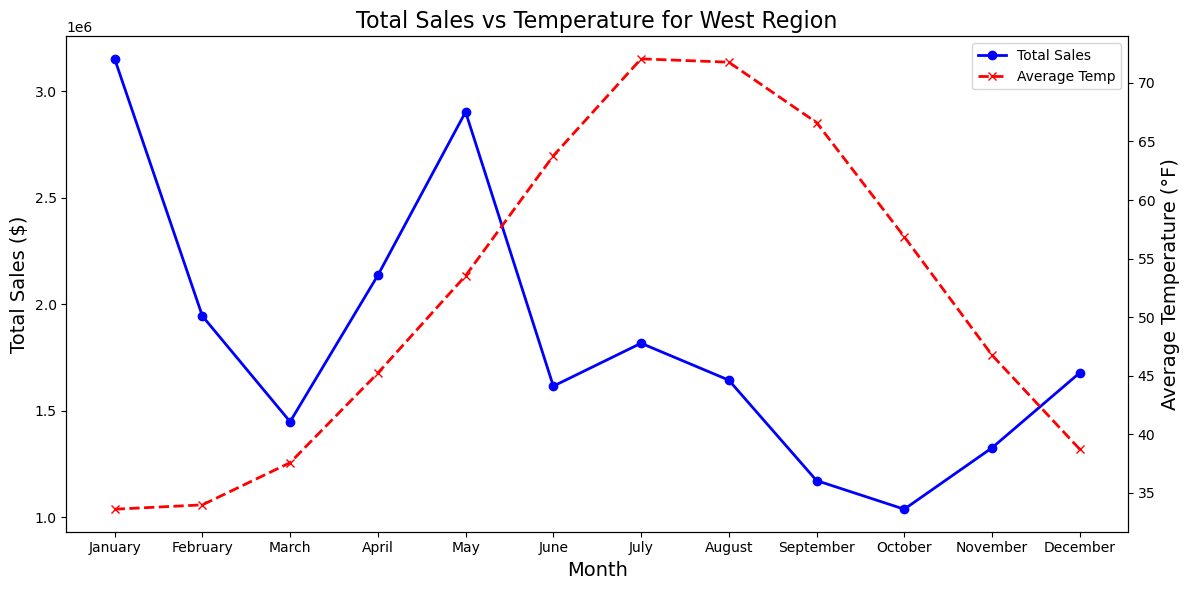

In [328]:


aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region']).agg(
    Total_Sales=('Total Sales', 'sum'),
    Avg_Temp=('Average Temp', 'mean')
).reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)

regions = aggregated_data['Region'].unique()

for region in regions:
    region_data = aggregated_data[aggregated_data['Region'] == region]
    
    region_data.sort_values('Month', inplace=True)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(
        region_data['Month'], region_data['Total_Sales'], 
        marker='o', linestyle='-', color='blue', linewidth=2, label='Total Sales'
    )
    ax1.set_ylabel('Total Sales ($)', fontsize=14)
    ax1.set_xlabel('Month', fontsize=14)
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left', fontsize=10)

    ax2 = ax1.twinx()
    ax2.plot(
        region_data['Month'], region_data['Avg_Temp'], 
        marker='x', linestyle='--', color='red', linewidth=2, label='Average Temp'
    )
    ax2.set_ylabel('Average Temperature (°F)', fontsize=14)
    ax2.tick_params(axis='y')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10)

    plt.title(f'Total Sales vs Temperature for {region} Region', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()

    plt.show()


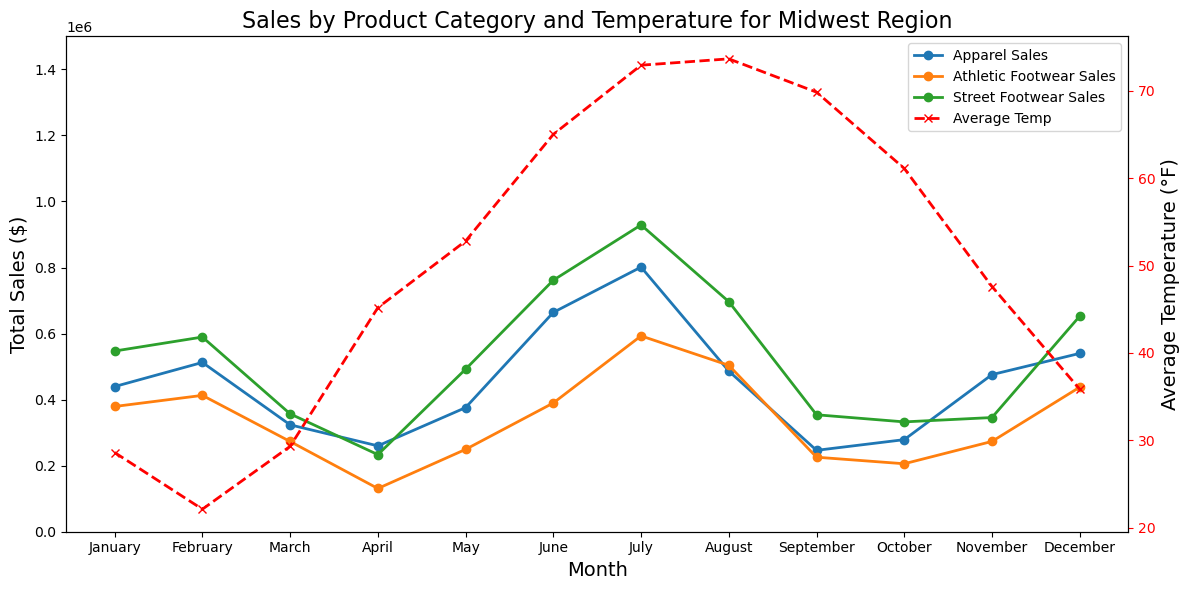

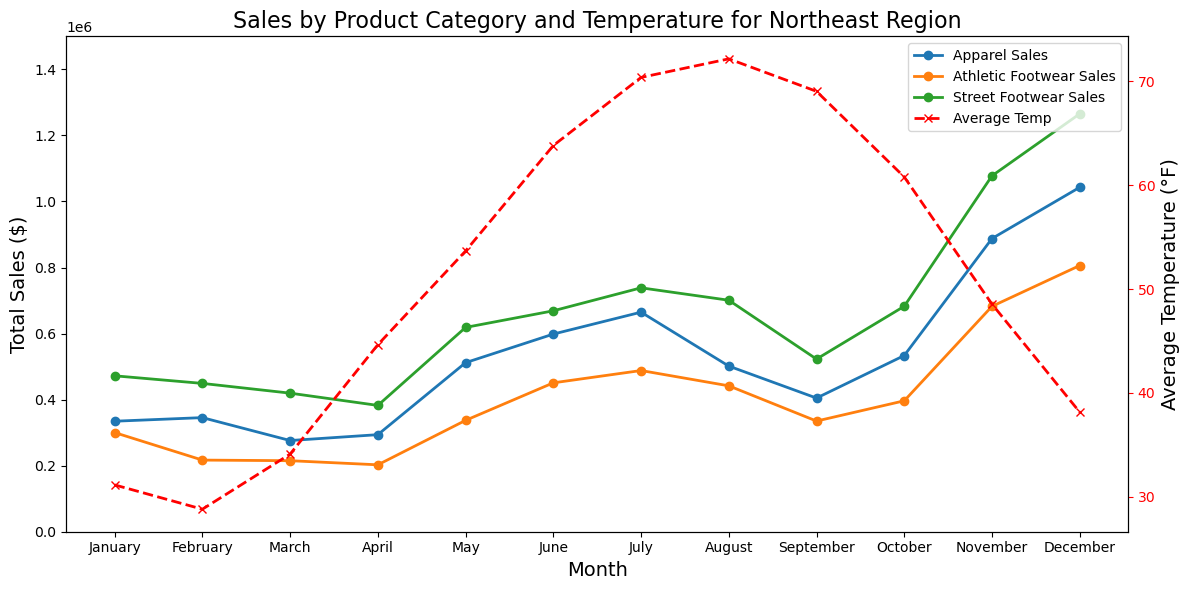

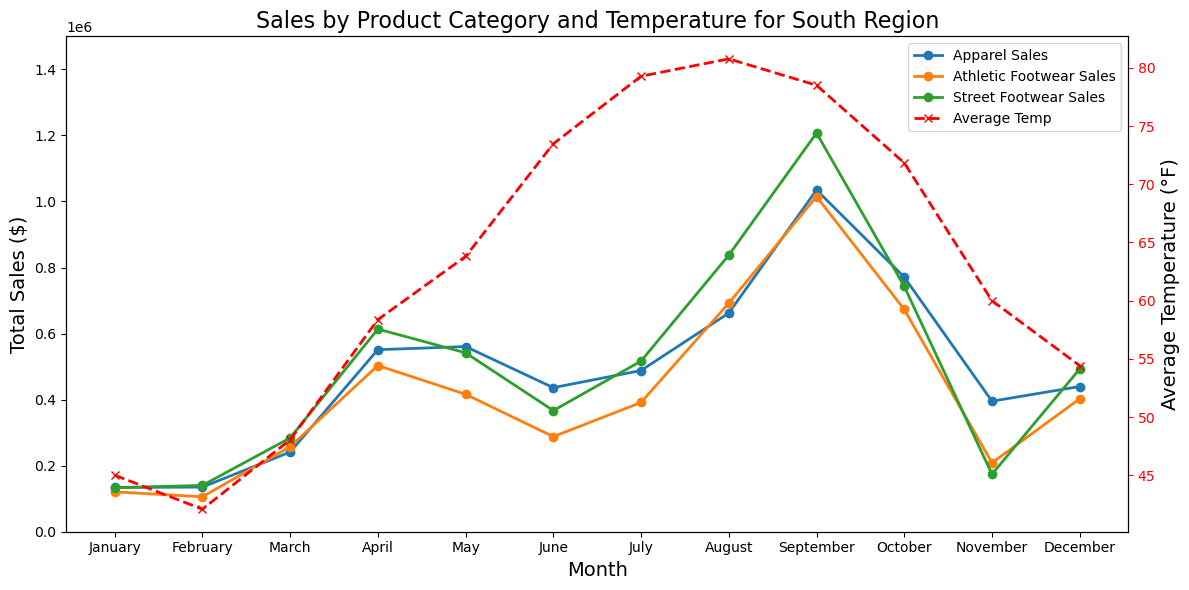

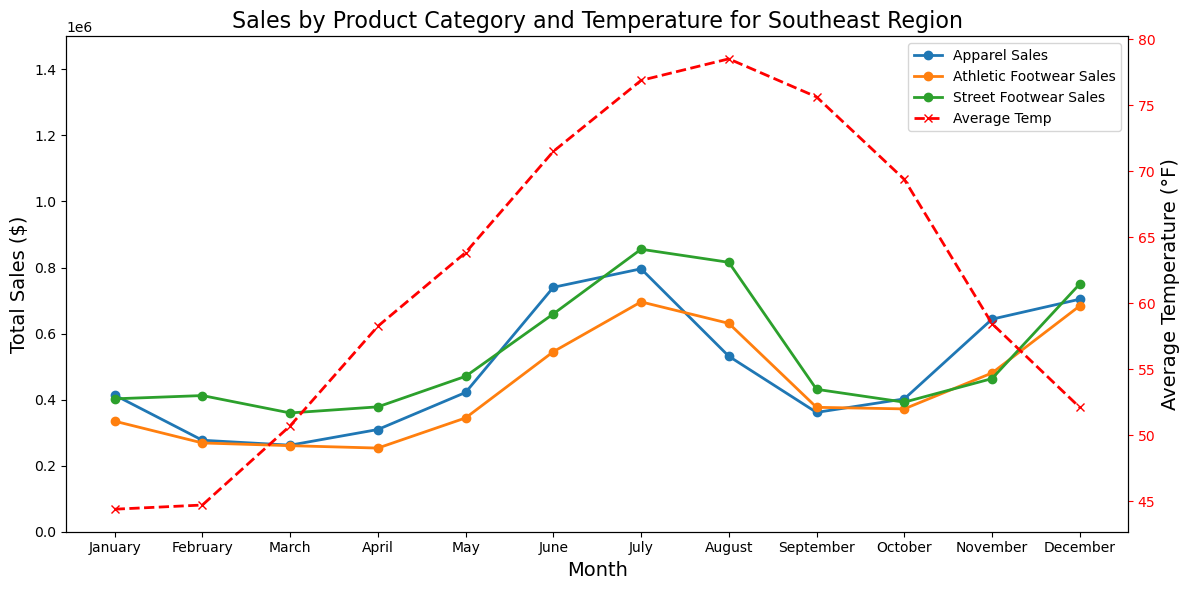

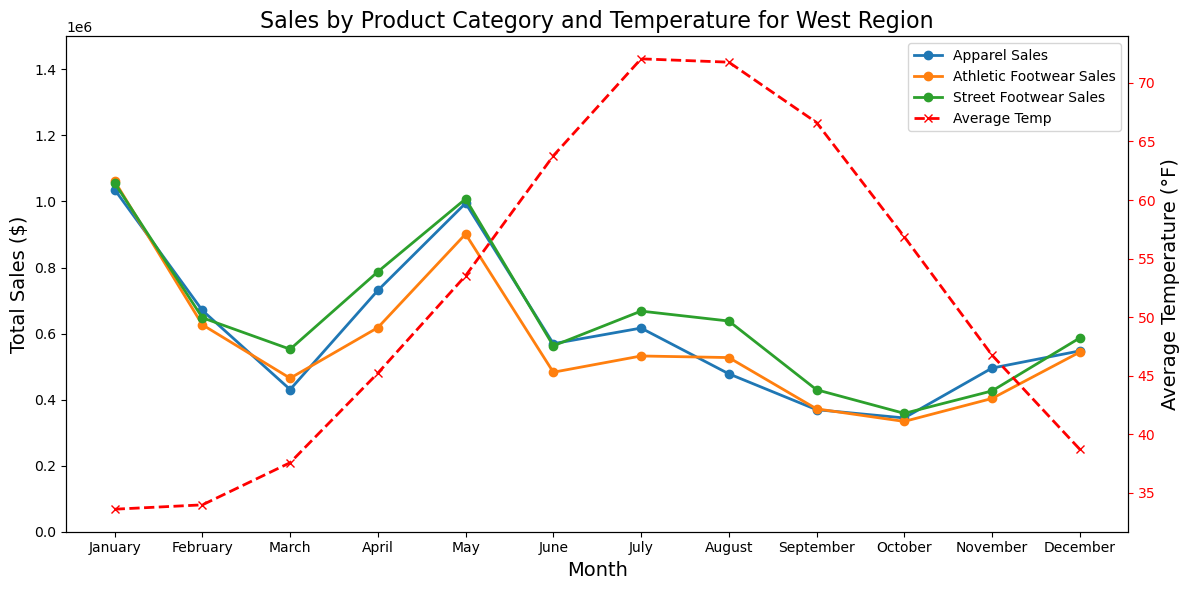

In [329]:


sales_data = revised_region_sales_temp_df.groupby(['Month', 'Region', 'Product'])['Total Sales'].sum().reset_index()

temp_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Average Temp'].mean().reset_index()

sales_data['Month'] = pd.to_numeric(sales_data['Month'], errors='coerce')
temp_data['Month'] = pd.to_numeric(temp_data['Month'], errors='coerce')

sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
temp_data['Month'] = temp_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)

month_order = list(calendar.month_name[1:])  

sales_data['Month'] = pd.Categorical(sales_data['Month'], categories=month_order, ordered=True)
temp_data['Month'] = pd.Categorical(temp_data['Month'], categories=month_order, ordered=True)

regions = sales_data['Region'].unique()

sales_min = 0  
sales_max = 1_500_000  

for region in regions:
    region_sales = sales_data[sales_data['Region'] == region]
    region_temp = temp_data[temp_data['Region'] == region]
    

    pivoted_sales = region_sales.pivot(index='Month', columns='Product', values='Total Sales')
    
    fig, ax1 = plt.subplots(figsize=(12, 6))

    for product in pivoted_sales.columns:
        ax1.plot(
            pivoted_sales.index, pivoted_sales[product], 
            marker='o', linestyle='-', linewidth=2, label=f'{product} Sales'
        )
    ax1.set_ylabel('Total Sales ($)', fontsize=14)
    ax1.set_xlabel('Month', fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_ylim(sales_min, sales_max)  
    ax1.legend(loc='upper left', fontsize=10)

    ax2 = ax1.twinx()
    ax2.plot(
        region_temp['Month'], region_temp['Average Temp'], 
        marker='x', linestyle='--', color='red', linewidth=2, label='Average Temp'
    )
    ax2.set_ylabel('Average Temperature (°F)', fontsize=14)
    ax2.tick_params(axis='y', colors='red')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10)

    plt.title(f'Sales by Product Category and Temperature for {region} Region', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()

    plt.show()


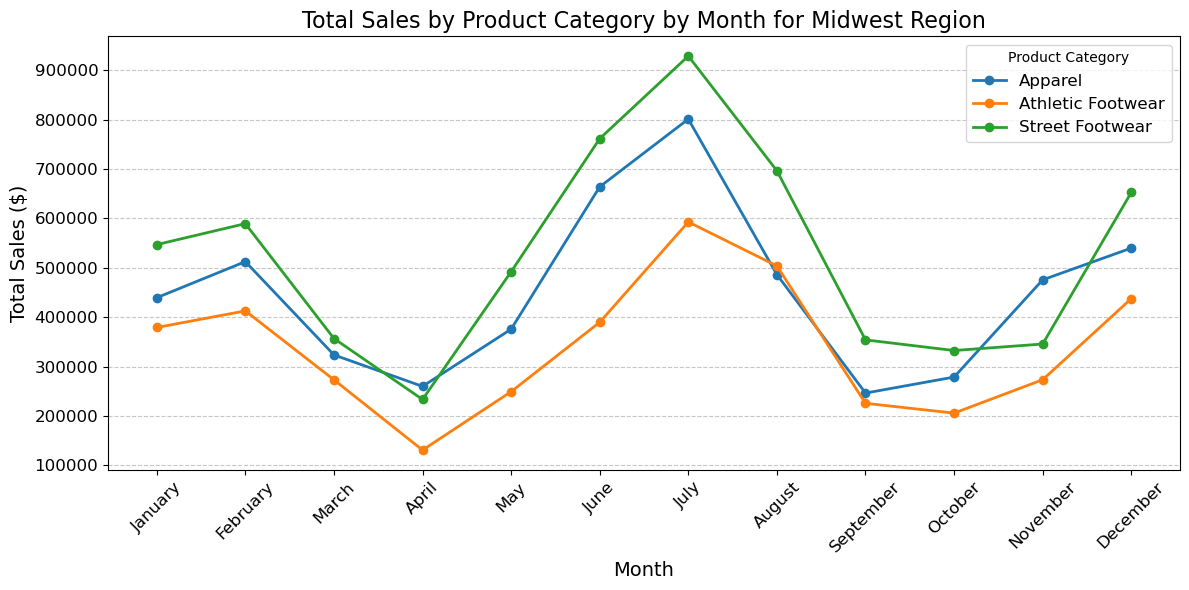

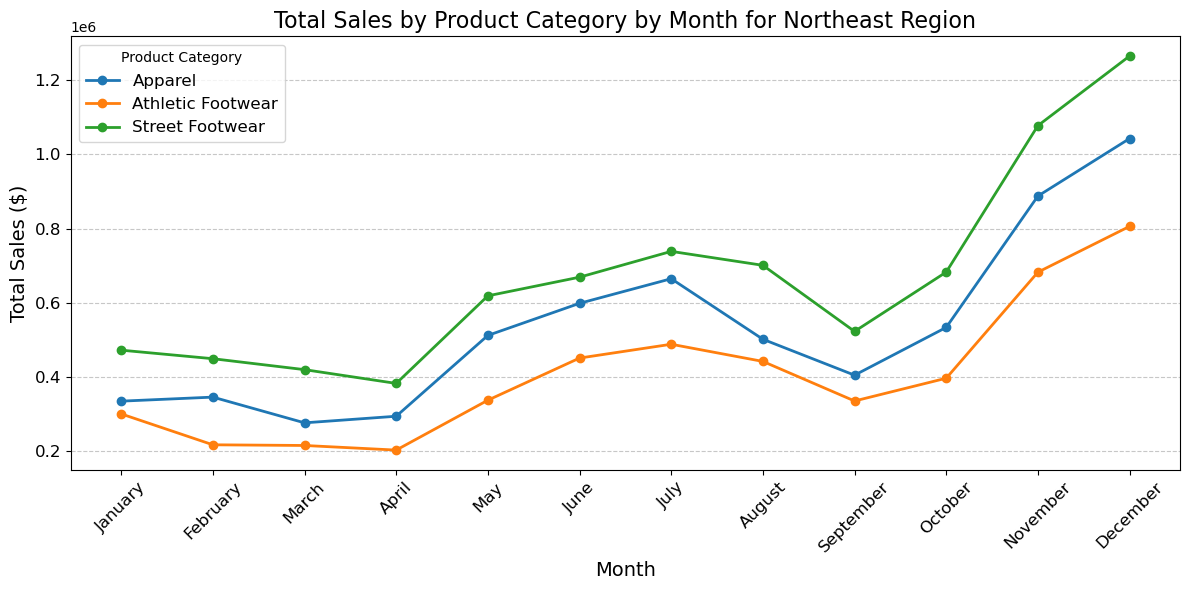

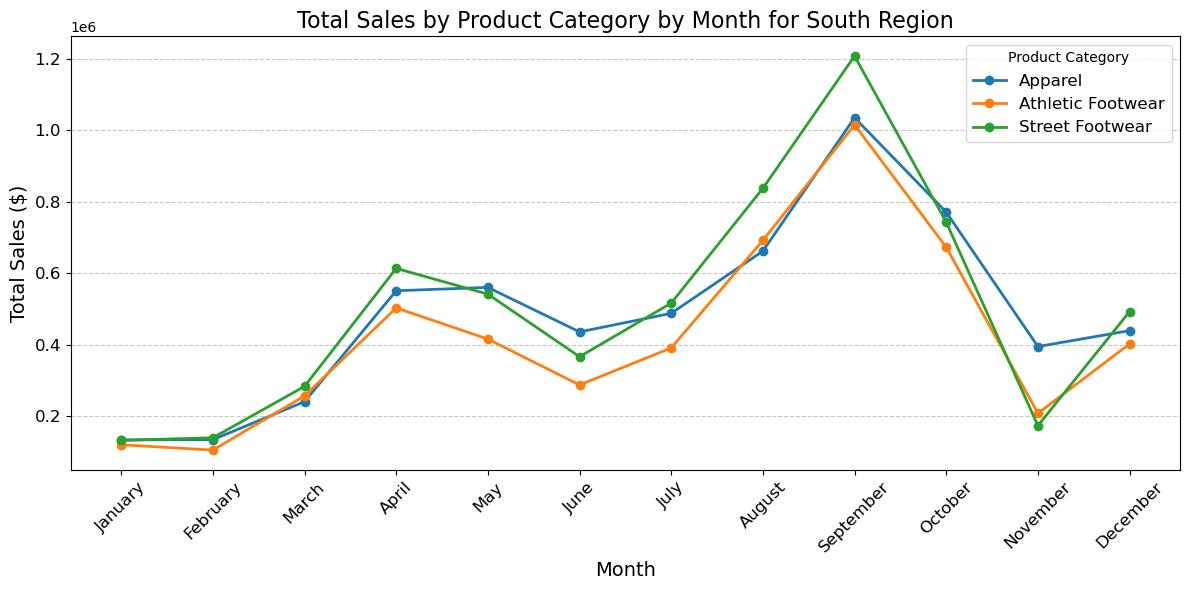

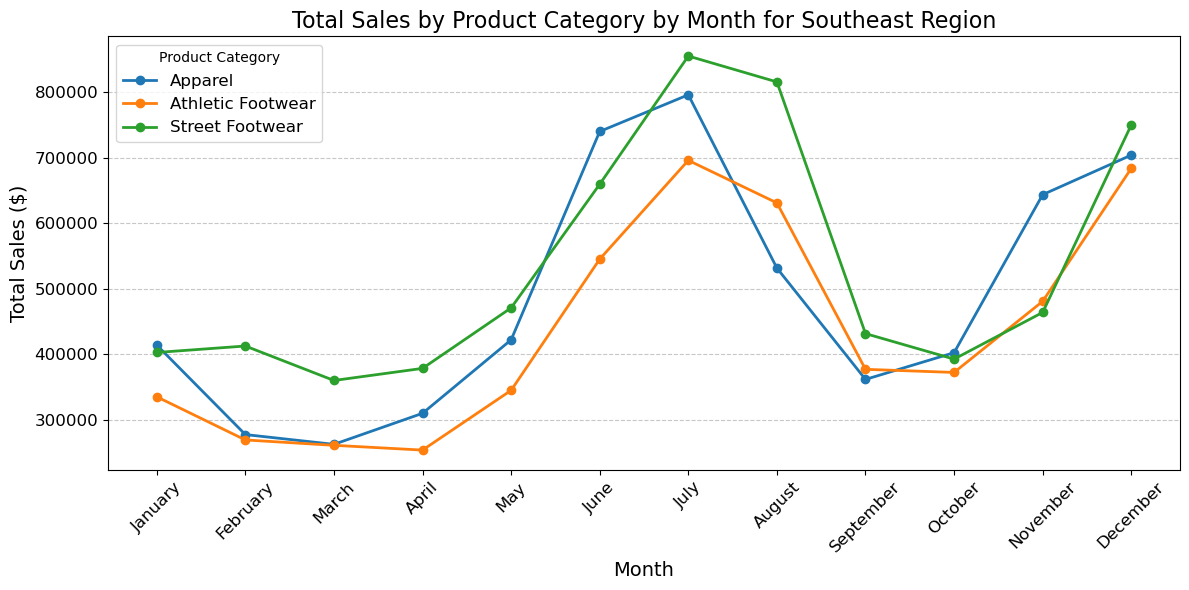

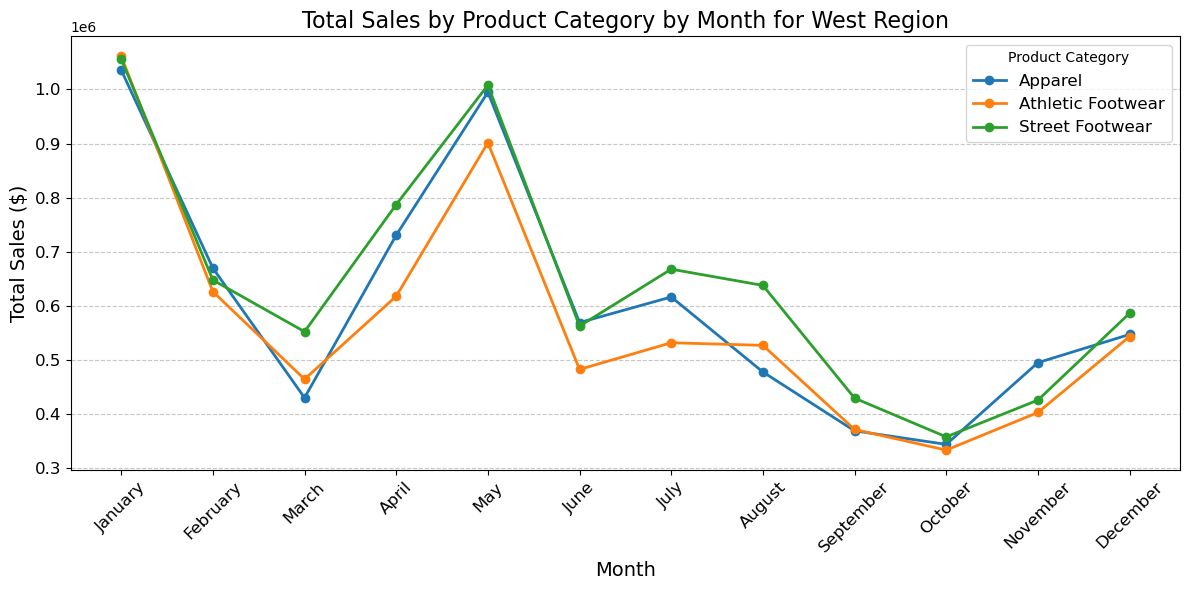

In [330]:


aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region', 'Product'])['Total Sales'].sum().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)

regions = aggregated_data['Region'].unique()

for region in regions:
    region_data = aggregated_data[aggregated_data['Region'] == region]

    pivoted_data = region_data.pivot(index='Month', columns='Product', values='Total Sales')

    plt.figure(figsize=(12, 6))
    for product in pivoted_data.columns:
        plt.plot(
            pivoted_data.index, pivoted_data[product], 
            marker='o', linestyle='-', linewidth=2, label=product
        )

    plt.title(f'Total Sales by Product Category by Month for {region} Region', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Sales ($)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Product Category', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.show()


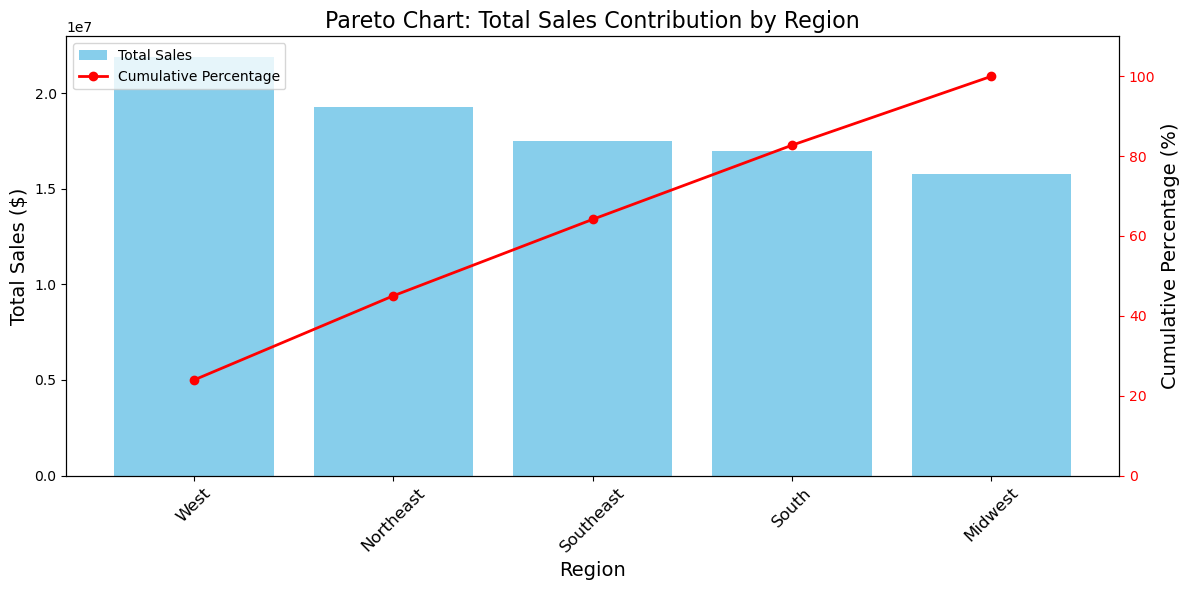

In [331]:
import matplotlib.pyplot as plt
import pandas as pd

region_sales = revised_region_sales_temp_df.groupby('Region')['Total Sales'].sum().reset_index()

region_sales = region_sales.sort_values('Total Sales', ascending=False)

region_sales['Cumulative Sales'] = region_sales['Total Sales'].cumsum()
region_sales['Cumulative Percentage'] = 100 * region_sales['Cumulative Sales'] / region_sales['Total Sales'].sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(region_sales['Region'], region_sales['Total Sales'], color='skyblue', label='Total Sales')
ax1.set_ylabel('Total Sales ($)', fontsize=14)
ax1.set_xlabel('Region', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_xticks(range(len(region_sales)))
ax1.set_xticklabels(region_sales['Region'], rotation=45, fontsize=12)

ax2 = ax1.twinx()
ax2.plot(
    region_sales['Region'], region_sales['Cumulative Percentage'], 
    marker='o', linestyle='-', color='red', linewidth=2, label='Cumulative Percentage'
)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim(0, 110)  

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

plt.title('Pareto Chart: Total Sales Contribution by Region', fontsize=16)
plt.tight_layout()

plt.show()


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/4017620546.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_data = aggregated_data.pivot_table(


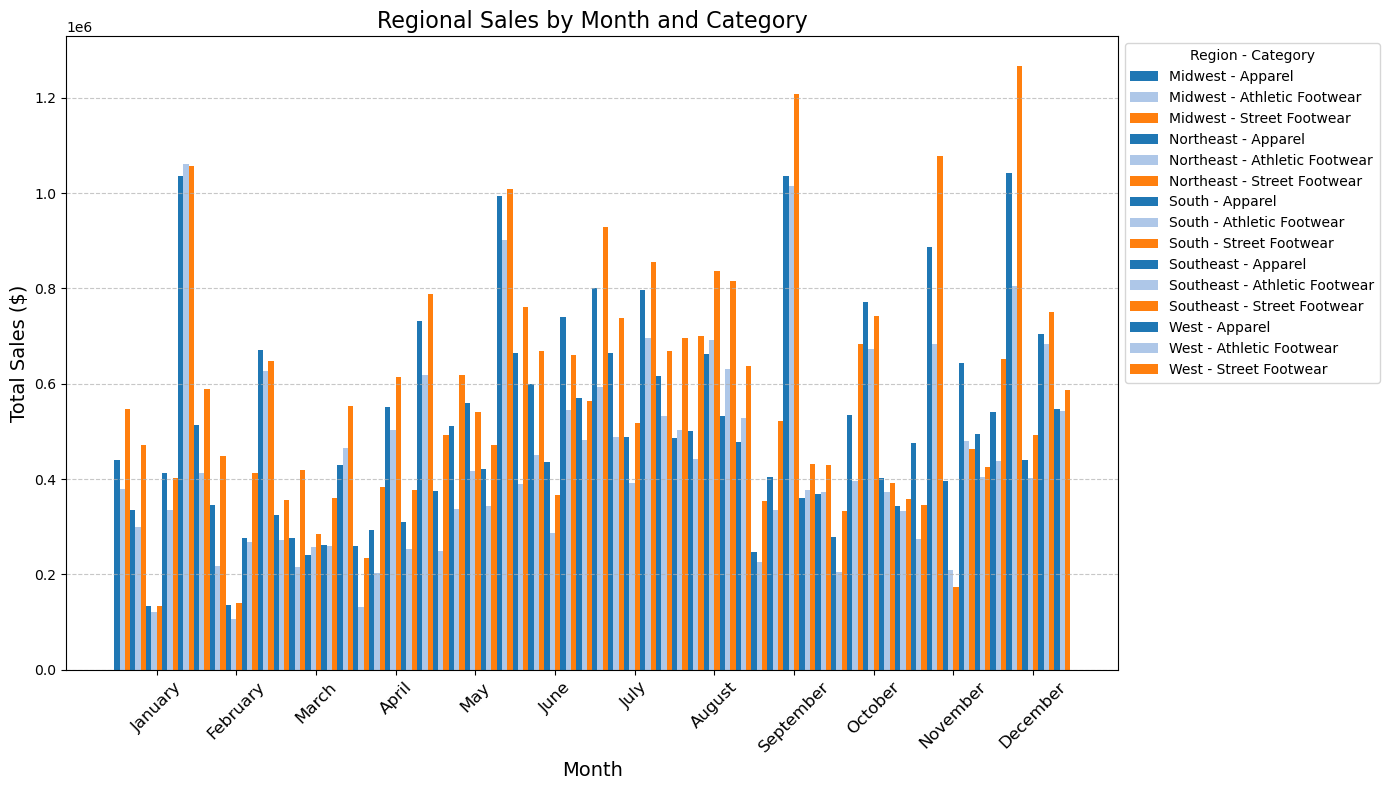

In [332]:


aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region', 'Product'])['Total Sales'].sum().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)

pivoted_data = aggregated_data.pivot_table(
    index=['Month', 'Region'], 
    columns='Product', 
    values='Total Sales', 
    aggfunc='sum'
).fillna(0)

categories = pivoted_data.columns
regions = pivoted_data.index.get_level_values('Region').unique()
months = pivoted_data.index.get_level_values('Month').unique()

x = np.arange(len(months))  
bar_width = 0.2  
colors = plt.cm.tab20.colors  

fig, ax = plt.subplots(figsize=(14, 8))

for i, region in enumerate(regions):
    for j, category in enumerate(categories):
        offset = (i - len(regions) / 2) * bar_width + j * bar_width / len(categories)
        bar_positions = x + offset
        sales = [
            pivoted_data.loc[(month, region), category] if (month, region) in pivoted_data.index else 0 
            for month in months
        ]
        ax.bar(bar_positions, sales, bar_width / len(categories), label=f'{region} - {category}', color=colors[j])

ax.set_title('Regional Sales by Month and Category', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Sales ($)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, fontsize=12)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region - Category', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/3584427838.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data['Total Sales by Month'] = aggregated_data.groupby('Month')['Total Sales'].transform('sum')


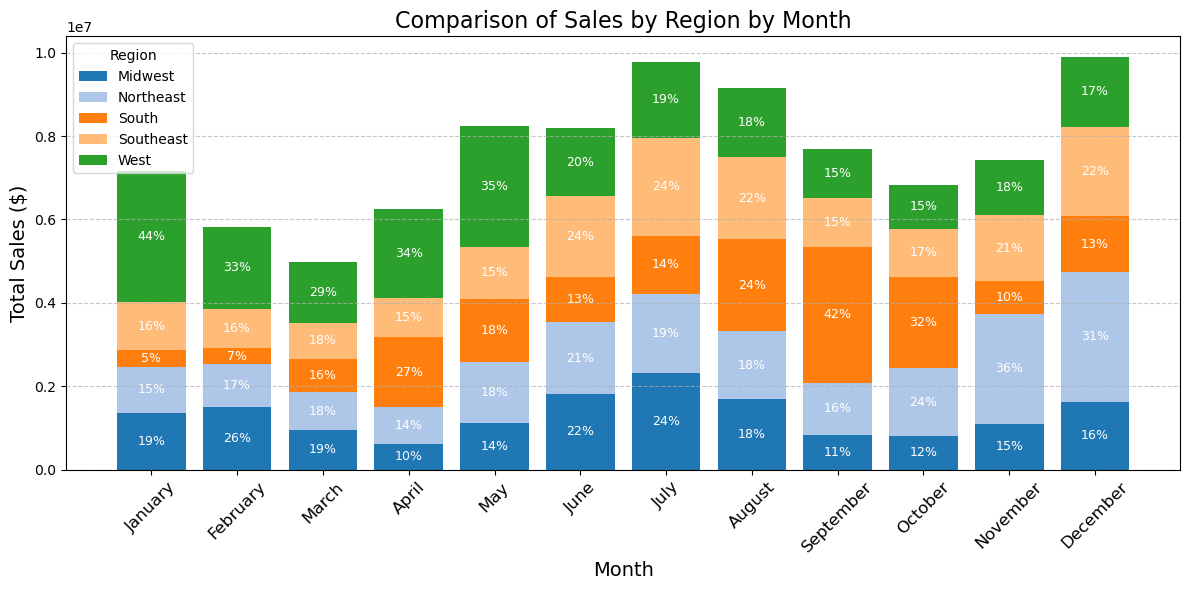

In [333]:
aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Total Sales'].sum().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)

aggregated_data['Total Sales by Month'] = aggregated_data.groupby('Month')['Total Sales'].transform('sum')
aggregated_data['Percentage'] = (aggregated_data['Total Sales'] / aggregated_data['Total Sales by Month']) * 100

pivoted_data = aggregated_data.pivot(index='Month', columns='Region', values='Total Sales').fillna(0)

colors = plt.cm.tab20.colors  
regions = pivoted_data.columns
months = pivoted_data.index

fig, ax = plt.subplots(figsize=(12, 6))
bottom = [0] * len(months)  

for i, region in enumerate(regions):
    ax.bar(
        months, 
        pivoted_data[region], 
        label=region, 
        bottom=bottom, 
        color=colors[i % len(colors)]
    )
    bottom = [b + s for b, s in zip(bottom, pivoted_data[region])]

for idx, month in enumerate(months):
    month_data = aggregated_data[aggregated_data['Month'] == month]
    y_offset = 0
    for _, row in month_data.iterrows():
        percentage = f"{row['Percentage']:.0f}%"
        value = f"{int(row['Total Sales']):,}"
        ax.text(
            idx, 
            y_offset + row['Total Sales'] / 2,  
            f"{percentage}", 
            ha='center', 
            va='center', 
            fontsize=9, 
            color='white'
        )
        y_offset += row['Total Sales']

ax.set_title('Comparison of Sales by Region by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Sales ($)', fontsize=14)
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, rotation=45, fontsize=12)
ax.legend(title='Region', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/3064615892.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data['Total Sales by Month'] = aggregated_data.groupby('Month')['Total Sales'].transform('sum')


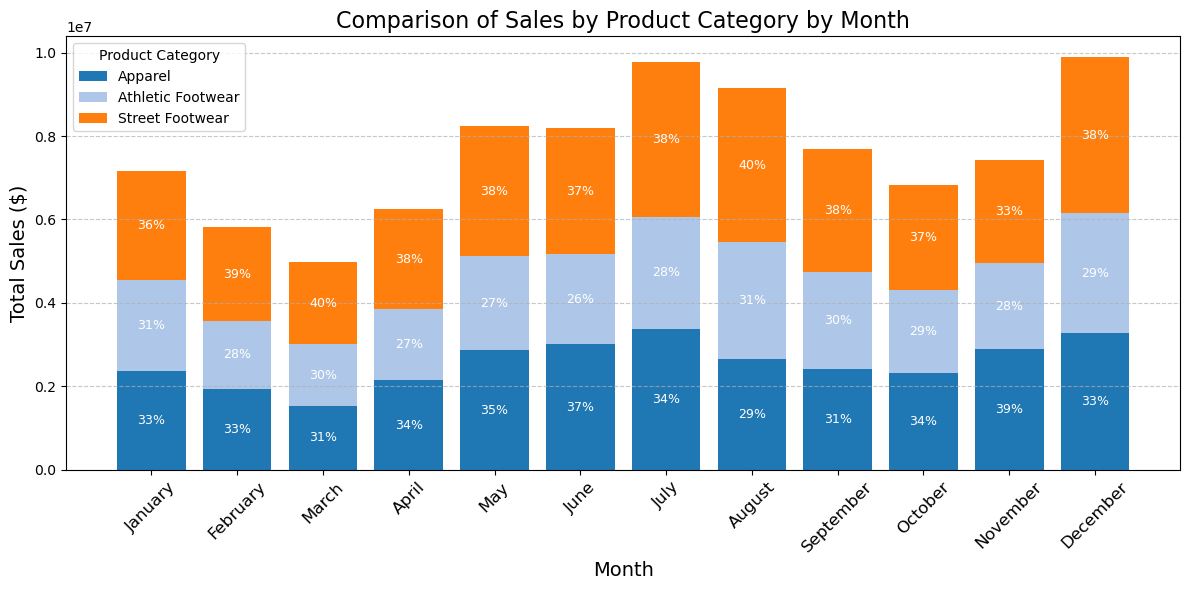

In [334]:

aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Product'])['Total Sales'].sum().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)

aggregated_data['Total Sales by Month'] = aggregated_data.groupby('Month')['Total Sales'].transform('sum')
aggregated_data['Percentage'] = (aggregated_data['Total Sales'] / aggregated_data['Total Sales by Month']) * 100

pivoted_data = aggregated_data.pivot(index='Month', columns='Product', values='Total Sales').fillna(0)

colors = plt.cm.tab20.colors  
products = pivoted_data.columns
months = pivoted_data.index

fig, ax = plt.subplots(figsize=(12, 6))
bottom = [0] * len(months)  

for i, product in enumerate(products):
    ax.bar(
        months, 
        pivoted_data[product], 
        label=product, 
        bottom=bottom, 
        color=colors[i % len(colors)]
    )
    bottom = [b + s for b, s in zip(bottom, pivoted_data[product])]

for idx, month in enumerate(months):
    month_data = aggregated_data[aggregated_data['Month'] == month]
    y_offset = 0
    for _, row in month_data.iterrows():
        percentage = f"{row['Percentage']:.0f}%"
        ax.text(
            idx, 
            y_offset + row['Total Sales'] / 2,  
            percentage, 
            ha='center', 
            va='center', 
            fontsize=9, 
            color='white'
        )
        y_offset += row['Total Sales']

ax.set_title('Comparison of Sales by Product Category by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Sales ($)', fontsize=14)
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, rotation=45, fontsize=12)
ax.legend(title='Product Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


In [335]:

revised_region_sales_temp_data = pd.DataFrame(revised_region_sales_temp_data)

def process_temperature_and_sales(revised_region_sales_temp_df):

    if not isinstance(revised_region_sales_temp_df, pd.DataFrame):
        raise TypeError("Input must be a Pandas DataFrame.")


    required_columns = ['Average Temp', 'Total Sales', 'Region', 'Product', 'Month']
    for col in required_columns:
        if col not in revised_region_sales_temp_df.columns:
            raise ValueError(f"Missing required column: {col}")


    buckets = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
    labels = [
        "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40",
        "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75",
        "75-80", "80-85", "85 and Above"
    ]

    revised_region_sales_temp_df['Temp Bucket'] = pd.cut(
        revised_region_sales_temp_df['Average Temp'], bins=buckets, labels=labels, right=False
    )

    aggregated_sales = revised_region_sales_temp_df.groupby(
        ['Temp Bucket', 'Region', 'Product', 'Month']
    )['Total Sales'].sum().reset_index()

    return revised_region_sales_temp_df, aggregated_sales

revised_region_sales_temp_df, processed_data = process_temperature_and_sales(revised_region_sales_temp_data)

print("Columns after processing:", revised_region_sales_temp_df.columns)
print("Processed data columns:", processed_data.columns)





Columns after processing: Index(['Unnamed: 0', 'State', 'Year', 'Month', 'Region', 'Gender', 'Product',
       'Units Sold', 'Total Sales', 'Average Temp', 'Temp Bucket'],
      dtype='object')
Processed data columns: Index(['Temp Bucket', 'Region', 'Product', 'Month', 'Total Sales'], dtype='object')


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/2075256165.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_sales = revised_region_sales_temp_df.groupby(


/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1888257385.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_data = aggregated_data.pivot_table(


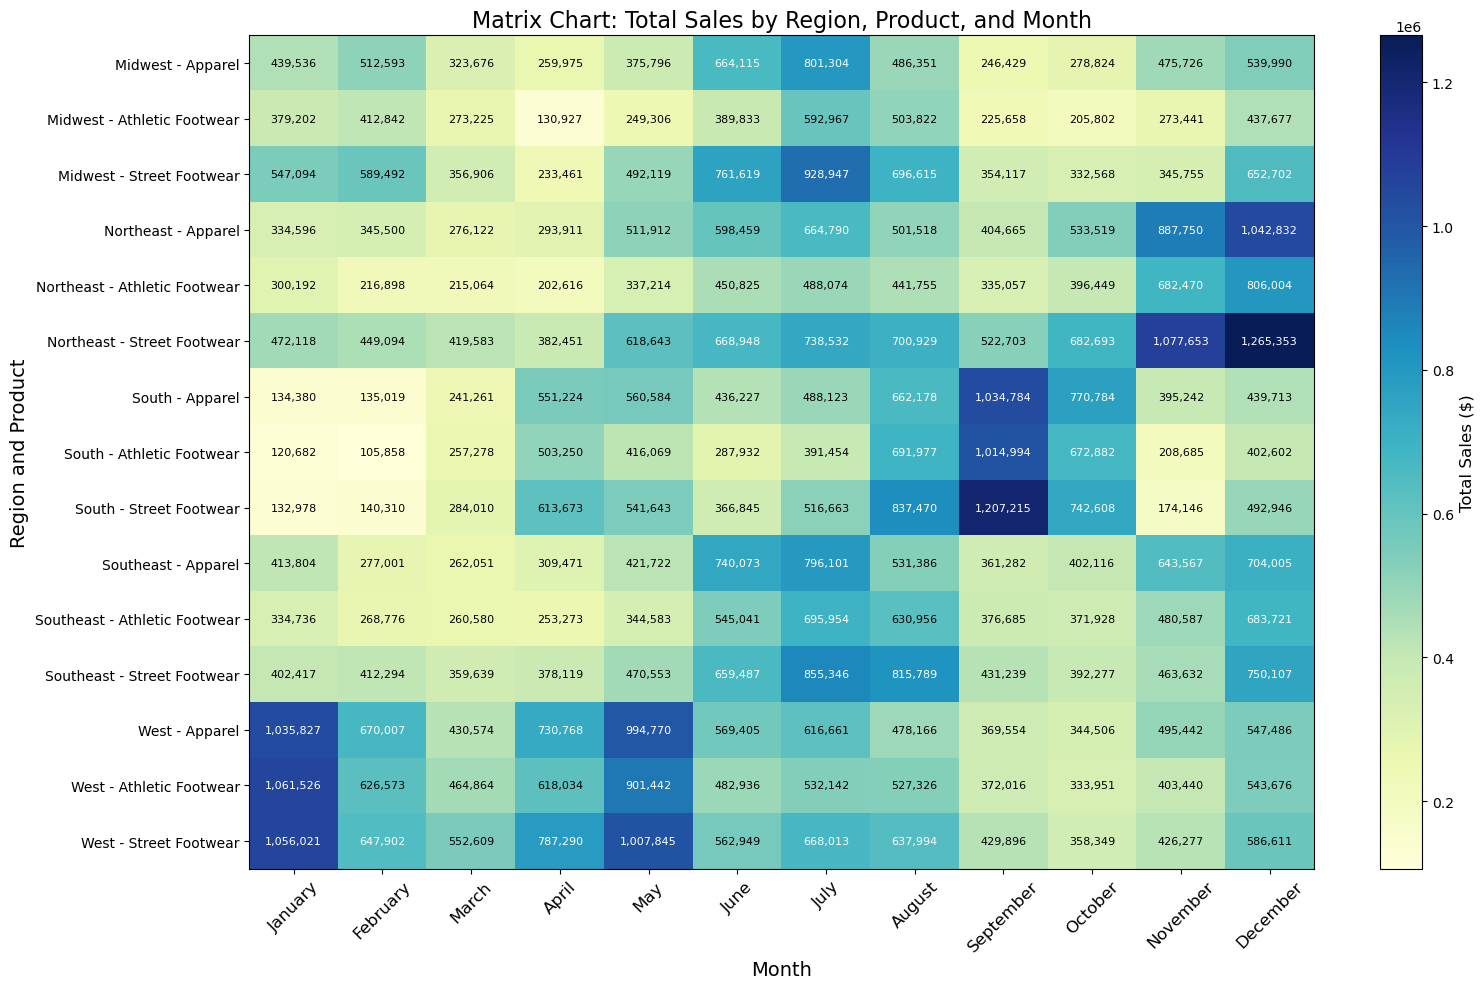

In [336]:


aggregated_data = revised_region_sales_temp_df.groupby(['Month', 'Region', 'Product'])['Total Sales'].sum().reset_index()

aggregated_data['Month'] = pd.to_numeric(aggregated_data['Month'], errors='coerce')
aggregated_data['Month'] = aggregated_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
aggregated_data['Month'] = pd.Categorical(aggregated_data['Month'], categories=month_order, ordered=True)

pivoted_data = aggregated_data.pivot_table(
    index=['Region', 'Product'], 
    columns='Month', 
    values='Total Sales', 
    aggfunc='sum'
).fillna(0)

matrix_data = pivoted_data.values  
x_labels = pivoted_data.columns    
y_labels = [' - '.join(index) for index in pivoted_data.index] 

fig, ax = plt.subplots(figsize=(16, 10))

cax = ax.imshow(matrix_data, aspect='auto', cmap='YlGnBu')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Total Sales ($)', fontsize=12)

ax.set_title('Matrix Chart: Total Sales by Region, Product, and Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Region and Product', fontsize=14)
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, fontsize=12)
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=10)

for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        value = matrix_data[i, j]
        ax.text(j, i, f"{int(value):,}", ha='center', va='center', fontsize=8, color='white' if value > matrix_data.max() / 2 else 'black')

plt.tight_layout()
plt.show()



/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/3954424344.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sales_pivot = sales_data.pivot_table(index=['Region', 'Product'], columns='Month', values='Total Sales', aggfunc='sum').fillna(0)
/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/3954424344.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  temp_pivot = temp_data.pivot_table(index='Region', columns='Month', values='Average Temp', aggfunc='mean').fillna(0)


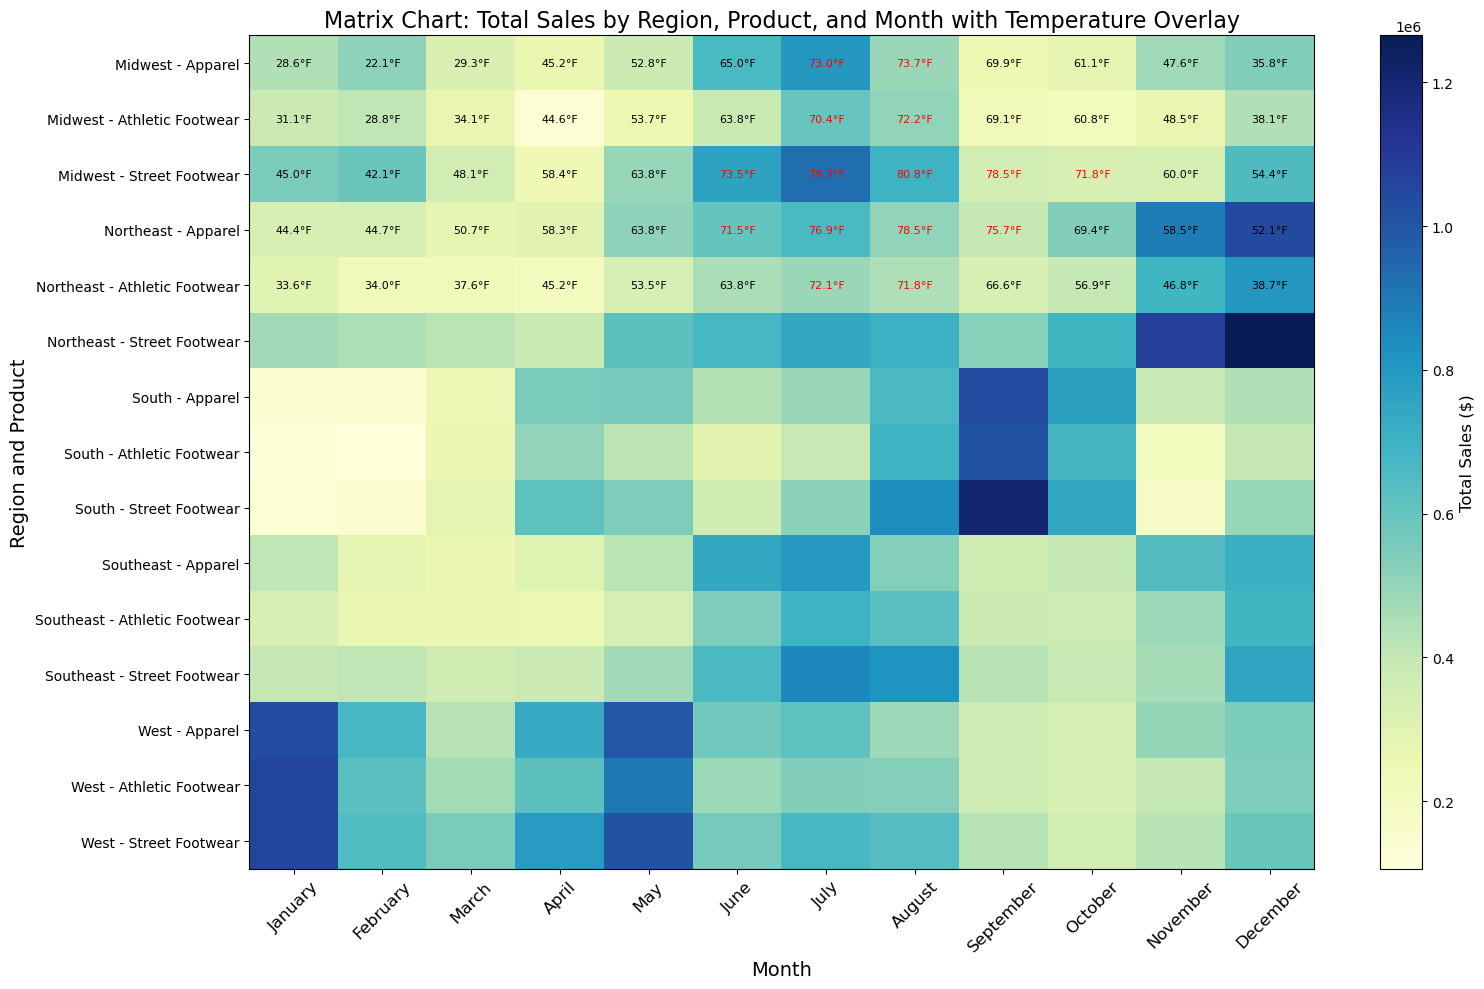

In [337]:


sales_data = revised_region_sales_temp_df.groupby(['Month', 'Region', 'Product'])['Total Sales'].sum().reset_index()

temp_data = revised_region_sales_temp_df.groupby(['Month', 'Region'])['Average Temp'].mean().reset_index()

sales_data['Month'] = pd.to_numeric(sales_data['Month'], errors='coerce')
temp_data['Month'] = pd.to_numeric(temp_data['Month'], errors='coerce')

sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
temp_data['Month'] = temp_data['Month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)

month_order = list(calendar.month_name[1:])  
sales_data['Month'] = pd.Categorical(sales_data['Month'], categories=month_order, ordered=True)
temp_data['Month'] = pd.Categorical(temp_data['Month'], categories=month_order, ordered=True)

sales_pivot = sales_data.pivot_table(index=['Region', 'Product'], columns='Month', values='Total Sales', aggfunc='sum').fillna(0)
temp_pivot = temp_data.pivot_table(index='Region', columns='Month', values='Average Temp', aggfunc='mean').fillna(0)

matrix_data = sales_pivot.values  
x_labels = sales_pivot.columns   
y_labels = [' - '.join(index) for index in sales_pivot.index] 

fig, ax = plt.subplots(figsize=(16, 10))

cax = ax.imshow(matrix_data, aspect='auto', cmap='YlGnBu', interpolation='nearest')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Total Sales ($)', fontsize=12)

for i, region in enumerate(temp_pivot.index):
    for j, month in enumerate(temp_pivot.columns):
        temp_value = temp_pivot.loc[region, month]
        ax.text(
            j, i, f"{temp_value:.1f}°F", 
            ha='center', va='center', fontsize=8, color='red' if temp_value > 70 else 'black'
        )


ax.set_title('Matrix Chart: Total Sales by Region, Product, and Month with Temperature Overlay', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Region and Product', fontsize=14)
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, fontsize=12)
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=10)

plt.tight_layout()

plt.show()


In [338]:
regions = revised_region_sales_temp_df['Region'].unique()
categories = revised_region_sales_temp_df['Product'].unique()

In [339]:
forecast_results = {}

In [340]:
for region in regions:
    for category in categories:
        data = revised_region_sales_temp_df[
            (revised_region_sales_temp_df['Region'] == region) &
            (revised_region_sales_temp_df['Product'] == category)
        ]

In [341]:
category_data = data.groupby('Month')['Total Sales'].sum().reset_index()

category_data = category_data.rename(columns={'Month': 'ds', 'Total Sales': 'y'})
category_data['ds'] = pd.to_datetime(category_data['ds'], errors='coerce')  # Ensure datetime format
category_data = category_data.dropna(subset=['ds', 'y'])  # Drop invalid rows



In [342]:
model = Prophet()
model.fit(category_data)

13:43:09 - cmdstanpy - INFO - Chain [1] start processing
13:43:09 - cmdstanpy - INFO - Chain [1] done processing


In [343]:
future = model.make_future_dataframe(periods=18, freq='M')
forecast = model.predict(future)

/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [344]:
forecast_results[(region, category)] = forecast


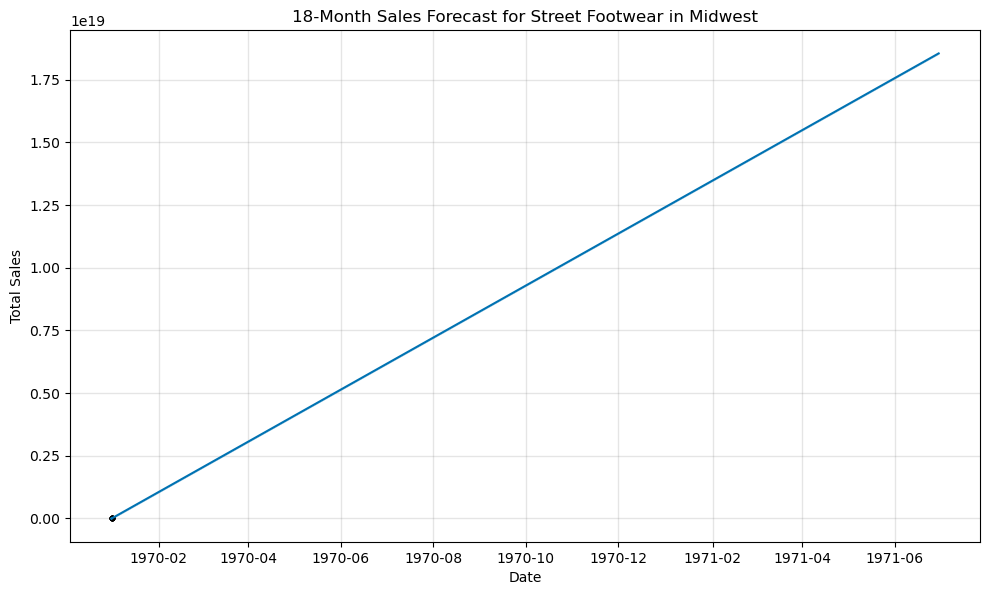

In [345]:
fig = model.plot(forecast)
plt.title(f"18-Month Sales Forecast for {category} in {region}")
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [346]:
revised_region_sales_temp_data = 'Resources/adidas_default.csv'
revised_region_sales_temp_df = pd.read_csv(revised_region_sales_temp_data,
                               index_col='Month')

print(revised_region_sales_temp_df.dtypes)

Unnamed: 0        int64
State            object
Year              int64
Region           object
Gender           object
Product          object
Units Sold        int64
Total Sales       int64
Average Temp    float64
dtype: object


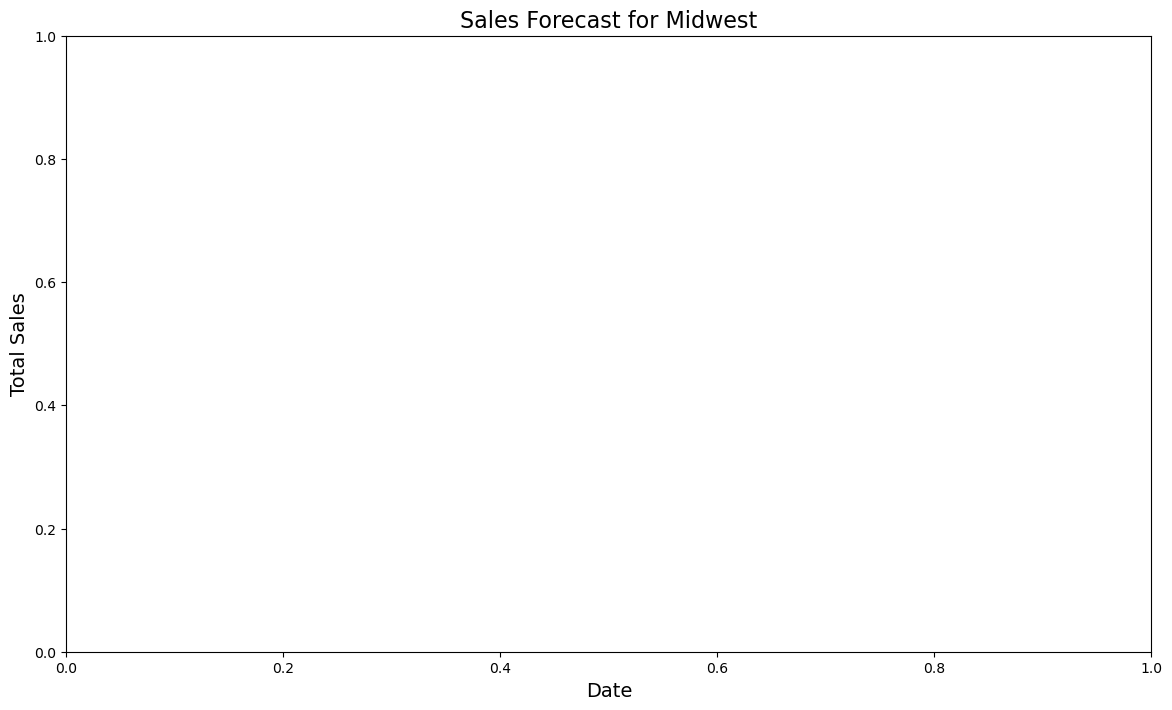

In [347]:


data['ds'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')
data = data.rename(columns={'Total Sales': 'y'})
data = data.dropna(subset=['ds', 'y'])

# Unique regions and products
regions = data['Region'].unique()
products = data['Product'].unique()

# Iterate over each region
for region in regions:
    # Filter data for this region
    region_data = data[data['Region'] == region]
    
    # Initialize a plot
    plt.figure(figsize=(14, 8))
    plt.title(f"Sales Forecast for {region}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Sales", fontsize=14)
    



In [348]:
for product in products:
    product_data = region_data[region_data['Product'] == product]
        
    if product_data.shape[0] < 2:
        print(f"Not enough data for {region} - {product}. Skipping.")
        continue
        


In [349]:
model = Prophet()
model.fit(product_data[['ds', 'y']])
        
future = model.make_future_dataframe(periods=18, freq='M')
forecast = model.predict(future)
        
        

13:43:09 - cmdstanpy - INFO - Chain [1] start processing
13:43:09 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [350]:

data['ds'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')
data = data.rename(columns={'Total Sales': 'y'})
data = data.dropna(subset=['ds', 'y'])

regions = data['Region'].unique()
products = data['Product'].unique()




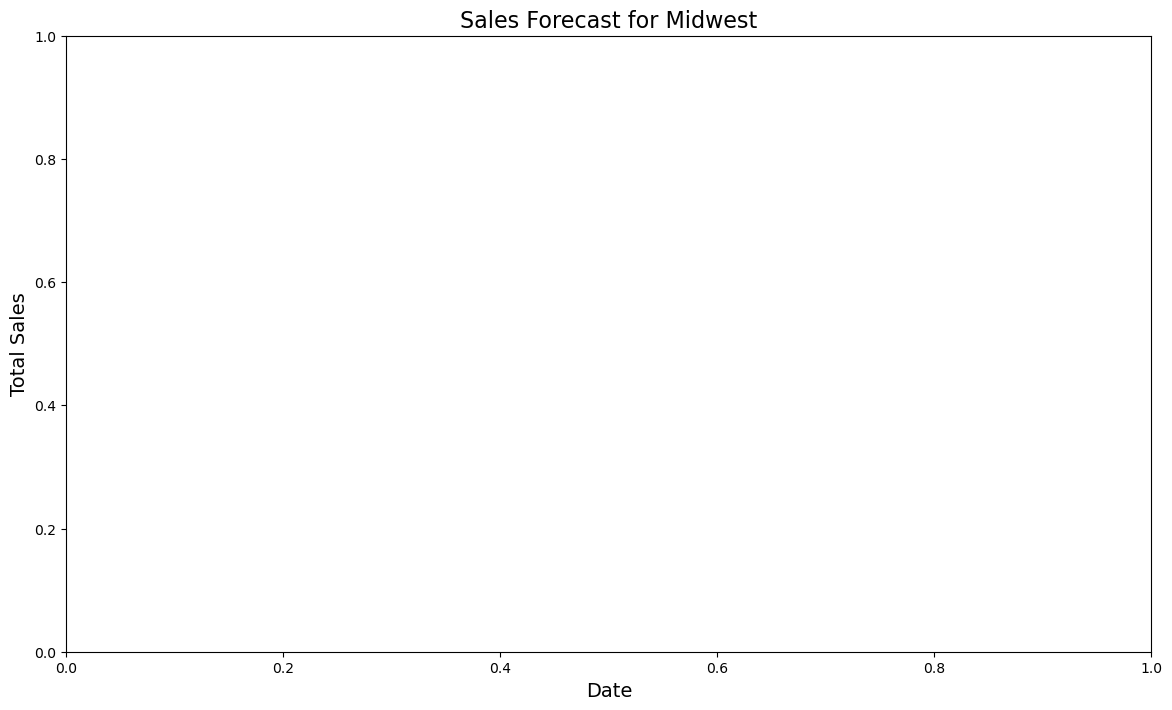

In [351]:
for region in regions:
    region_data = data[data['Region'] == region]
    
    plt.figure(figsize=(14, 8))
    plt.title(f"Sales Forecast for {region}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Sales", fontsize=14)
    
    for product in products:
        product_data = region_data[region_data['Product'] == product]
        
        if product_data.shape[0] < 2:
            print(f"Not enough data for {region} - {product}. Skipping.")
            continue
        


13:43:09 - cmdstanpy - INFO - Chain [1] start processing
13:43:09 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


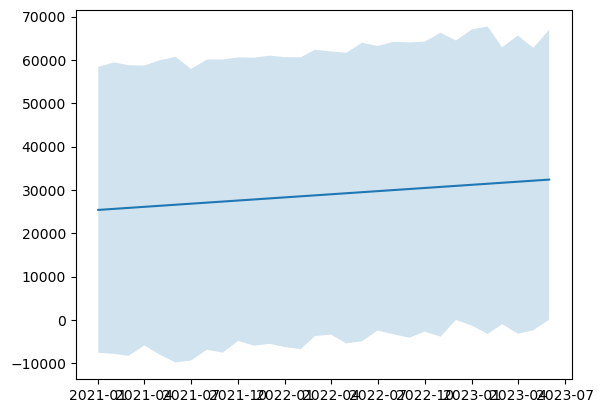

In [352]:
model = Prophet()
model.fit(product_data[['ds', 'y']])
        
future = model.make_future_dataframe(periods=18, freq='M')
forecast = model.predict(future)
        
plt.plot(forecast['ds'], forecast['yhat'], label=f"{product} Forecast")
plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        alpha=0.2,
        label=f"{product} Confidence Interval"
        )
    


In [353]:
plt.legend(title="Product Categories", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_73476/1190121674.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Product Categories", fontsize=12)


In [354]:

# Ensure 'ds' is properly converted to datetime
data['ds'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')
data = data.rename(columns={'Total Sales': 'y'})
data = data.dropna(subset=['ds', 'y'])

# Step 1: Calculate the maximum y value for the West region
west_data = data[data['Region'] == 'West']
if not west_data.empty:
    max_y_value = west_data['y'].max()  # Get the max y value from the West region
else:
    print("No data available for the West region.")
    max_y_value = data['y'].max()  # Fallback to global max

# Round up the max value to the nearest 10,000 for consistency
standard_y_limit = np.ceil(max_y_value / 10000) * 10000

# Step 2: Iterate through regions and plot
regions = data['Region'].unique()
products = data['Product'].unique()

for region in regions:
    # Filter data for this region
    region_data = data[data['Region'] == region]
    
    # Initialize a plot
    plt.figure(figsize=(14, 8))
    plt.title(f"Sales Forecast for {region}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Sales", fontsize=14)
    
    # Plot forecasts for all products in the region
    for product in products:
        # Filter data for this product
        product_data = region_data[region_data['Product'] == product]
        
        if product_data.shape[0] < 2:
            print(f"Not enough data for {region} - {product}. Skipping.")
            continue
        
        # Train a Prophet model
        model = Prophet()
        model.fit(product_data[['ds', 'y']])
        
        # Forecast the next 18 months
        future = model.make_future_dataframe(periods=18, freq='M')
        forecast = model.predict(future)
        
        # Plot the forecast
        plt.plot(forecast['ds'], forecast['yhat'], label=f"{product} Forecast")
        plt.fill_between(
            forecast['ds'],
            forecast['yhat_lower'],
            forecast['yhat_upper'],
            alpha=0.2,
        )
    
    # Step 3: Apply standardized y-axis limit
    plt.ylim(0, standard_y_limit)
    plt.legend(title="Product Categories", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


13:43:10 - cmdstanpy - INFO - Chain [1] start processing
13:43:10 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


No data available for the West region.


In [355]:
data['ds'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')
data = data.rename(columns={'Total Sales': 'y'})
data = data.dropna(subset=['ds', 'y'])

y_min = -100000
y_max = 300000

In [356]:
regions = data['Region'].unique()
products = data['Product'].unique()

for region in regions:
    region_data = data[data['Region'] == region]
    
    plt.figure(figsize=(14, 8))
    plt.title(f"Sales Forecast for {region}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Sales", fontsize=14)
    
    for product in products:
        product_data = region_data[region_data['Product'] == product]
        
        if product_data.shape[0] < 2:
            print(f"Not enough data for {region} - {product}. Skipping.")
            continue
        
        model = Prophet()
        model.fit(product_data[['ds', 'y']])
        
        # 18mo fcst
        future = model.make_future_dataframe(periods=18, freq='M')
        forecast = model.predict(future)
        
        
        plt.plot(forecast['ds'], forecast['yhat'], label=f"{product} Forecast")
        plt.fill_between(
            forecast['ds'],
            forecast['yhat_lower'],
            forecast['yhat_upper'],
            alpha=0.2,
        )
    
    plt.ylim(y_min, y_max)
    plt.legend(title="Product Categories", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

13:43:10 - cmdstanpy - INFO - Chain [1] start processing
13:43:10 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dev_1/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
